In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from semopy import Model, calc_stats
from semopy import semplot
import matplotlib.pyplot as plt

In [2]:
# Load morphometry data
df_all_cores = pd.read_csv("foram_frag_morphometry.csv", encoding='latin-1')

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_34421/1822374775.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_cores = pd.read_csv("foram_frag_morphometry.csv", encoding='latin-1')


In [3]:
# Separate foraminifera and fragment data
foram_data = df_all_cores[df_all_cores['Type'] == 'Planktonic Formainifera']
fragment_data = df_all_cores[df_all_cores['Type'] == 'Fragments']

In [4]:
# Drop rows with unknown Core ID
foram_data = foram_data[foram_data["Sample"] != "unknown"]
fragment_data = fragment_data[fragment_data["Sample"] != "unknown"]

In [5]:
# Confirm unique core ids 
foram_data['Sample'].unique()

array(['BARP9403', 'BARP9406', 'BARP9409', 'BARP9412', 'BARP9422',
       'BARP9426', 'BARP9430', 'BARP9434', 'BARP9437 ', 'BARP9439',
       'BARP9441', 'BARP9442', 'BARP9443', 'MDB04-2873',
       'MD04-2875B 0-2 Autolabel and Cleaned', 'MD04-2876',
       'MD04-2877 0-2 Autolable and Cleaned', 'MD12-3418C2', 'MD12-3423',
       'MD 76-011', 'MD76-132', 'MD76-133 ', 'MD76-136',
       'MD76-164 0-2 Autolabel and Cleaned', 'MD77-160 ', 'MD77-169',
       'MD77-171 ', 'MD77-178', 'MD77-180 ', 'MD77-182 ', 'MD77-184 ',
       'MD77-185 0-2 Autolabel and Cleaned', 'MD77-195', 'MD77-197',
       'MD77-200', 'MD77-202', 'MD77-204', 'MD77-205', 'MD79-256',
       'MD79-257', 'MD79-260d', 'MD79-261', 'MD79-275', 'MD79-276',
       'MD79-277 0-2 Autolable and Cleaned', 'MD81-345', 'MD85-640',
       'MD90-0936', 'MD90-0938', 'MD90-0939', 'MD90-0940',
       'MD90-0949 0-1 Autolabel and Cleaned',
       'MD90-O955 0-3 Autolabel and Cleaned',
       'MD90-0956 0-2 Autolabel and Cleaned', 'MD90-

In [6]:
# Strictly retrieve Core Ids only
foram_data['core_id'] = foram_data['Sample'].apply(lambda x: x.split(" ")[0])
fragment_data['core_id'] = fragment_data['Sample'].apply(lambda x: x.split(" ")[0])

In [7]:
# Replace wrong texts with their appropriate Core IDs in the Planktonic Formainifera data
foram_data['core_id'] = (foram_data['core_id'].replace("MD", "MD76-011")
                         .replace("MDB04-2873", "MD04-2873")
                         .replace("MD79-260d", "MD79-260")
                         .replace("BARDP9411", "BARP9411") 
                         .replace("MD90-O955", "MD90-0955") 
                         )


# Confirm string replacements
foram_data['core_id'].unique()

array(['BARP9403', 'BARP9406', 'BARP9409', 'BARP9412', 'BARP9422',
       'BARP9426', 'BARP9430', 'BARP9434', 'BARP9437', 'BARP9439',
       'BARP9441', 'BARP9442', 'BARP9443', 'MD04-2873', 'MD04-2875B',
       'MD04-2876', 'MD04-2877', 'MD12-3418C2', 'MD12-3423', 'MD76-011',
       'MD76-132', 'MD76-133', 'MD76-136', 'MD76-164', 'MD77-160',
       'MD77-169', 'MD77-171', 'MD77-178', 'MD77-180', 'MD77-182',
       'MD77-184', 'MD77-185', 'MD77-195', 'MD77-197', 'MD77-200',
       'MD77-202', 'MD77-204', 'MD77-205', 'MD79-256', 'MD79-257',
       'MD79-260', 'MD79-261', 'MD79-275', 'MD79-276', 'MD79-277',
       'MD81-345', 'MD85-640', 'MD90-0936', 'MD90-0938', 'MD90-0939',
       'MD90-0940', 'MD90-0949', 'MD90-0955', 'MD90-0956', 'MD90-0957',
       'MD90-0958', 'MD90-0959', 'MD90-0960', 'MD90-0961', 'MD90-0963',
       'MD96-2044', 'MD96-2045', 'MD96-2049', 'MD96-2051', 'MD96-2053',
       'MD96-2054', 'MD96-2055', 'MD96-2056', 'MD96-2058', 'MD96-2059',
       'MD96-2060', 'MD96-2061

In [8]:
# Replace wrong texts with their appropriate Core IDs in the fragments data
fragment_data['core_id'] = (fragment_data['core_id'].replace("MD", "MD76-011")
                         .replace("MDB04-2873", "MD04-2873")
                         .replace("MD79-260d", "MD79-260")
                         .replace("BARDP9411", "BARP9411") 
                         .replace("MD90-O955", "MD90-0955") 
                         )

# Confirm string replacements
fragment_data['core_id'].unique()

array(['BARP9411', 'BARP9403', 'BARP9406', 'BARP9409', 'BARP9412',
       'BARP9422', 'BARP9426', 'BARP9430', 'BARP9434', 'BARP9437',
       'BARP9439', 'BARP9441', 'BARP9442', 'BARP9443', 'MD04-2873',
       'MD04-2875B', 'MD04-2876', 'MD04-2877', 'MD12-3418C2', 'MD12-3423',
       'MD76-011', 'MD76-132', 'MD76-133', 'MD76-136', 'MD76-164',
       'MD77-160', 'MD77-169', 'MD77-171', 'MD77-178', 'MD77-180',
       'MD77-182', 'MD77-184', 'MD77-185', 'MD77-195', 'MD77-197',
       'MD77-200', 'MD77-202', 'MD77-204', 'MD77-205', 'MD79-256',
       'MD79-257', 'MD79-260', 'MD79-261', 'MD79-275', 'MD79-276',
       'MD79-277', 'MD81-345', 'MD85-640', 'MD90-0936', 'MD90-0938',
       'MD90-0939', 'MD90-0940', 'MD90-0949', 'MD90-0955', 'MD90-0956',
       'MD90-0957', 'MD90-0958', 'MD90-0959', 'MD90-0960', 'MD90-0961',
       'MD90-0963', 'MD96-2044', 'MD96-2045', 'MD96-2049', 'MD96-2051',
       'MD96-2053', 'MD96-2054', 'MD96-2055', 'MD96-2056', 'MD96-2058',
       'MD96-2059', 'MD96-2060'

In [9]:
# Load data containing target Core IDs
df_target_cores = pd.read_csv("dissolution_manuscript_final.csv")

In [10]:
# Extract target core ids
target_cores = df_target_cores.iloc[ : , 0]
target_cores = list(target_cores)

In [11]:
# Create new planktonic foraminifera DataFrame based on target Core IDs
df_foram = foram_data[foram_data['core_id'].isin(target_cores)]

In [12]:
# Create new fragment DataFrame based on target Core IDs
df_fragment = fragment_data[fragment_data['core_id'].isin(target_cores)]

In [13]:
# Confirm no target core is missing
missing_target_cores_foram = []

missing_target_cores_foram.extend(
    core for core in target_cores if core not in df_foram['core_id'].unique()
)

# Show list of missing target cores
print(missing_target_cores_foram) # Should return an empty list if no core is missing

[]


In [14]:
# Confirm no target core is missing
missing_target_cores_frag = []

missing_target_cores_frag.extend(
    core for core in target_cores if core not in df_fragment['core_id'].unique()
)

# Show list of missing target cores
print(missing_target_cores_frag) # Should return an empty list if no core is missing

[]


In [15]:
# Group each data by sample (Core ID)
forams_grouped = df_foram.groupby('core_id')
fragments_grouped = df_fragment.groupby('core_id')

## Remove Outliers

In [16]:
def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column using the IQR method.

    Args:
        df: The Pandas DataFrame.
        column: The name of the column to remove outliers from.

    Returns:
        A new DataFrame with the outliers removed.
    """

    # Calculate quantiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

In [17]:
def get_foram_working_data():
    """
    Processes foram data by removing outliers for each unique core_id and 
    concatenates the results into a single DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing the processed data for all samples.
    """
    result = pd.DataFrame()
    for sample in df_foram['core_id'].unique():
        foram_data = forams_grouped.get_group(sample)
        processed_data = remove_outliers_iqr(foram_data, 'Diameter')
        result = pd.concat([result, processed_data])
    return result

In [18]:
def get_frag_working_data():
    """
    Processes fragment data by removing outliers for each unique core_id and 
    concatenates the results into a single DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing the processed data for all samples.
    """
    frag_result = pd.DataFrame()
    for sample in df_fragment['core_id'].unique():
        fragment_data = fragments_grouped.get_group(sample)
        frag_processed_data = remove_outliers_iqr(fragment_data, 'Diameter')
        frag_result = pd.concat([frag_result, frag_processed_data])
    return frag_result

In [19]:
# Store groups without outliers in a new variable
foram_df_no_outliers = get_foram_working_data()
frag_df_no_outliers = get_frag_working_data()

In [20]:
# Create groups by unique core_id
foram_no_outlier_grouped = foram_df_no_outliers.groupby('core_id')
frag_no_outlier_grouped =  frag_df_no_outliers.groupby('core_id')

### Fragment size distribution plots

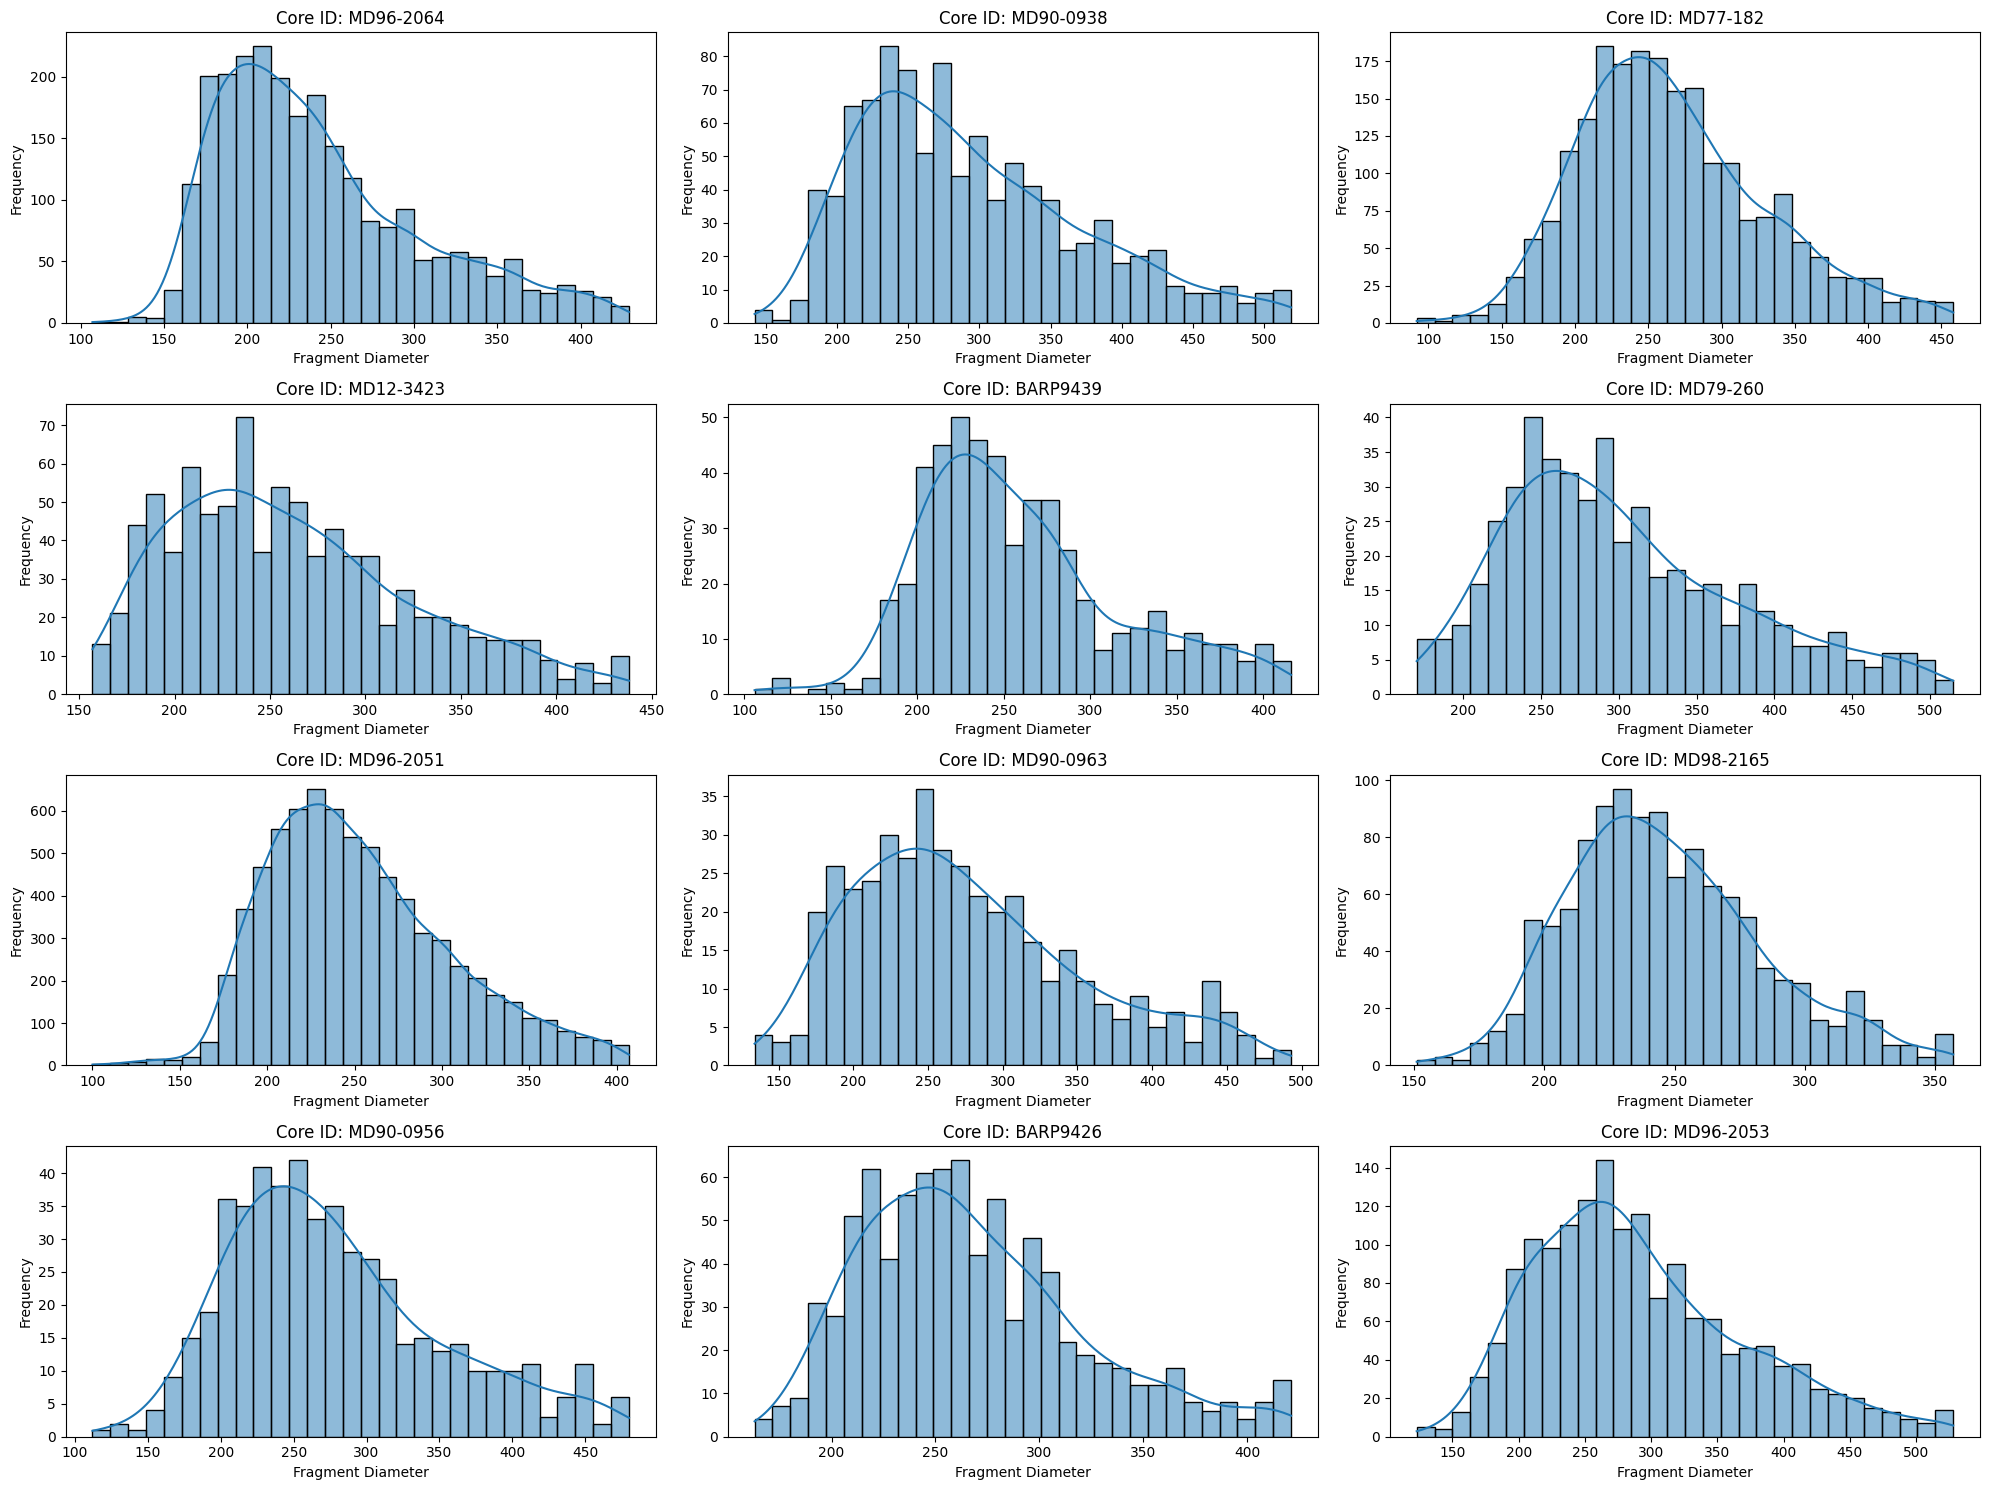

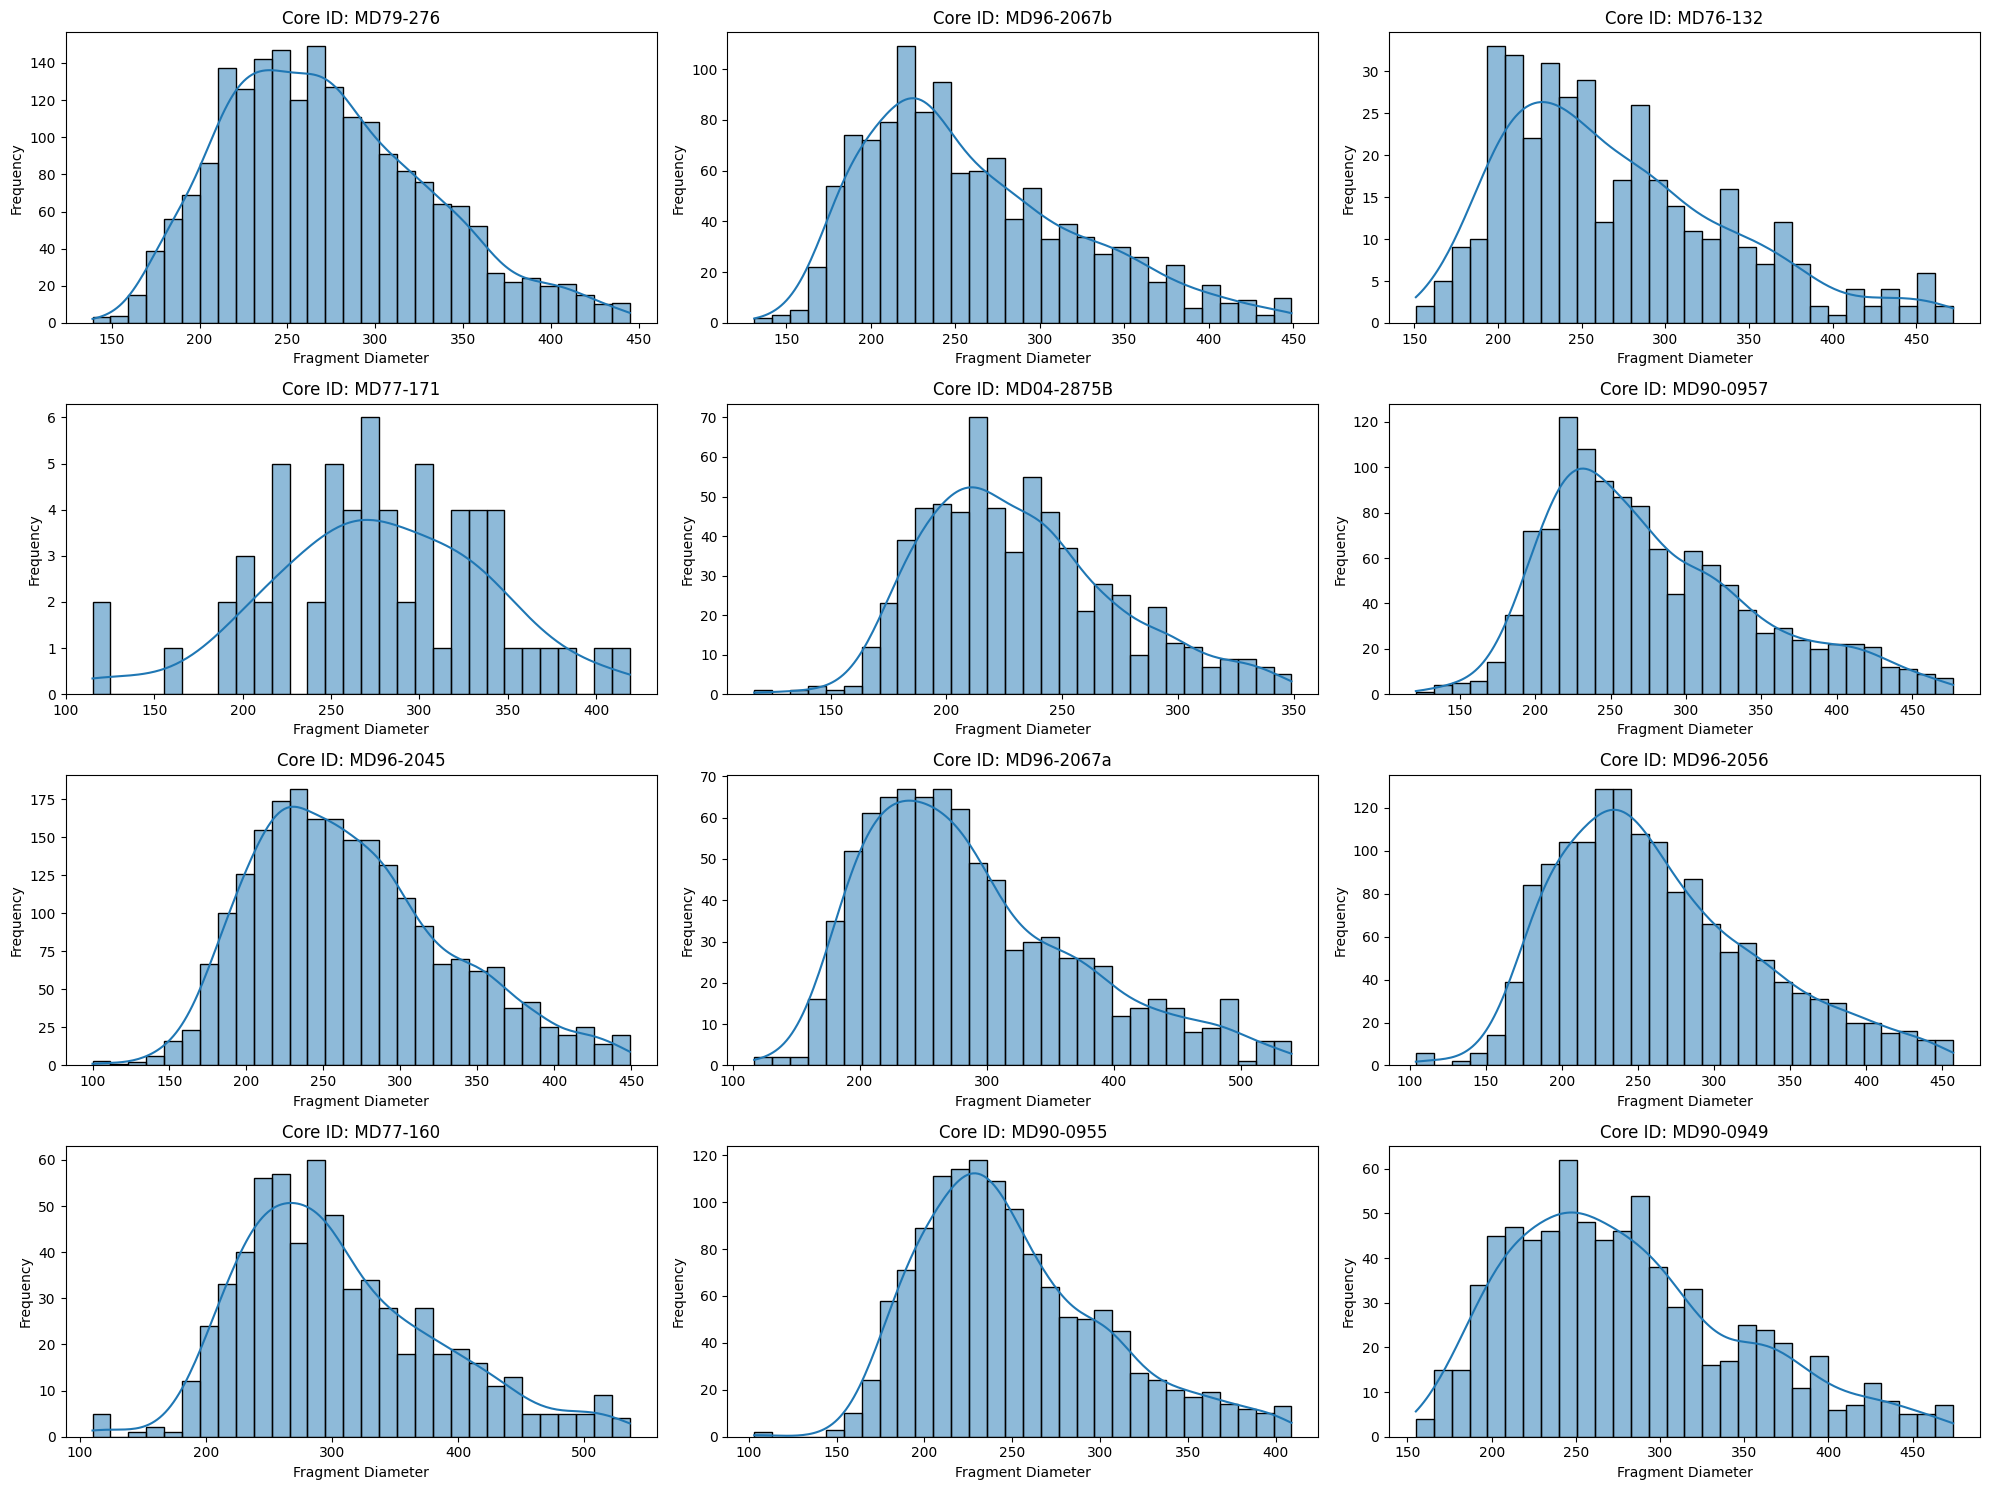

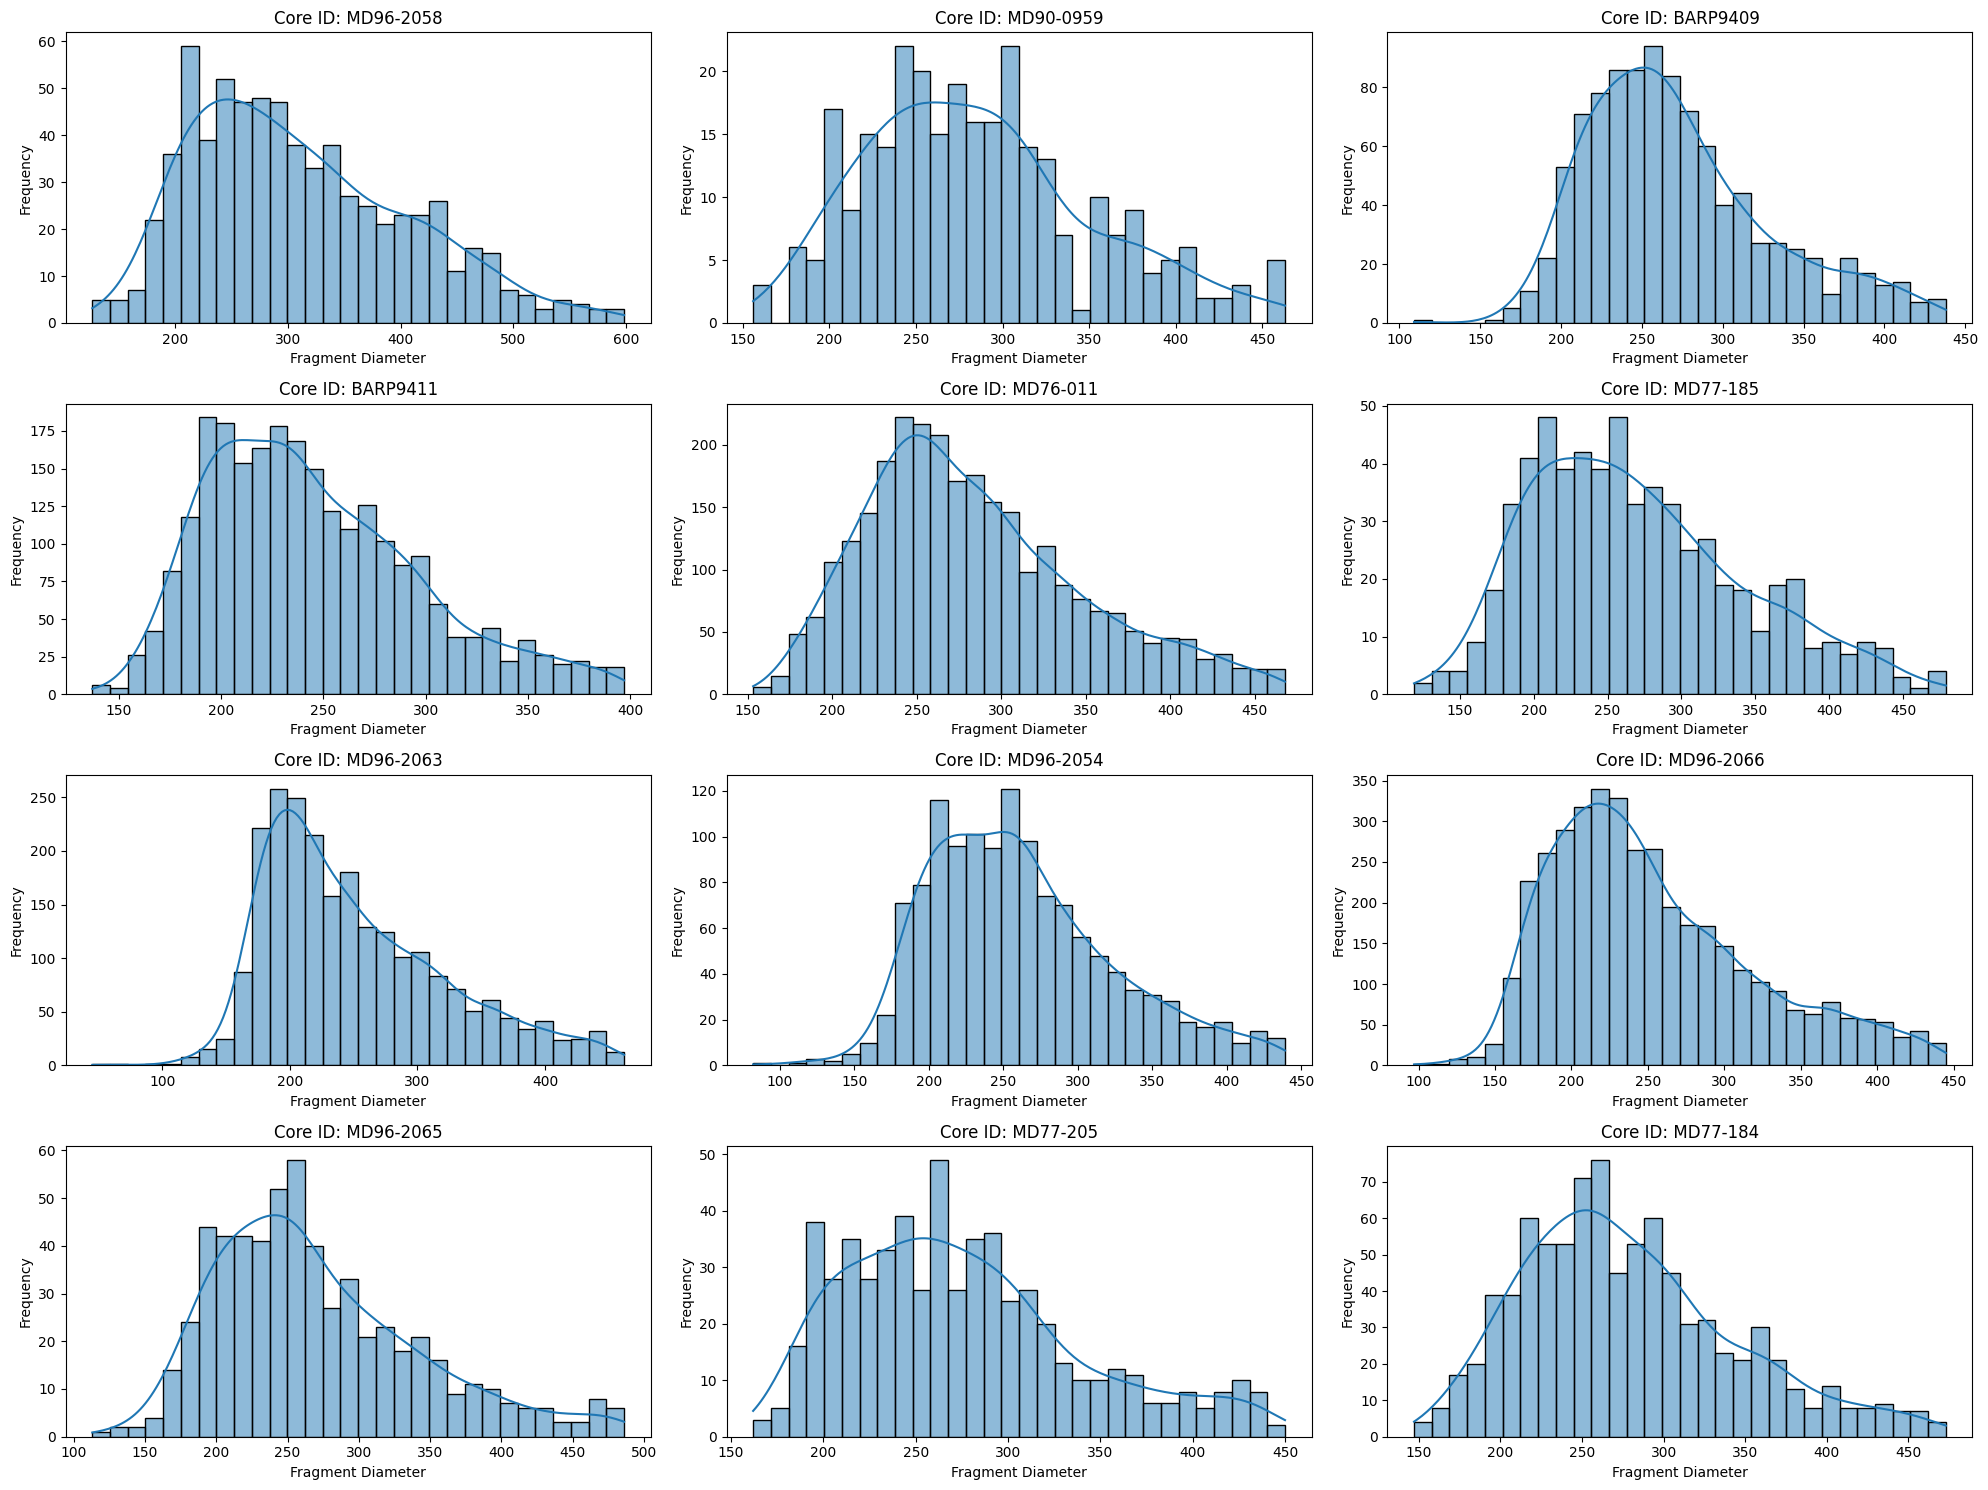

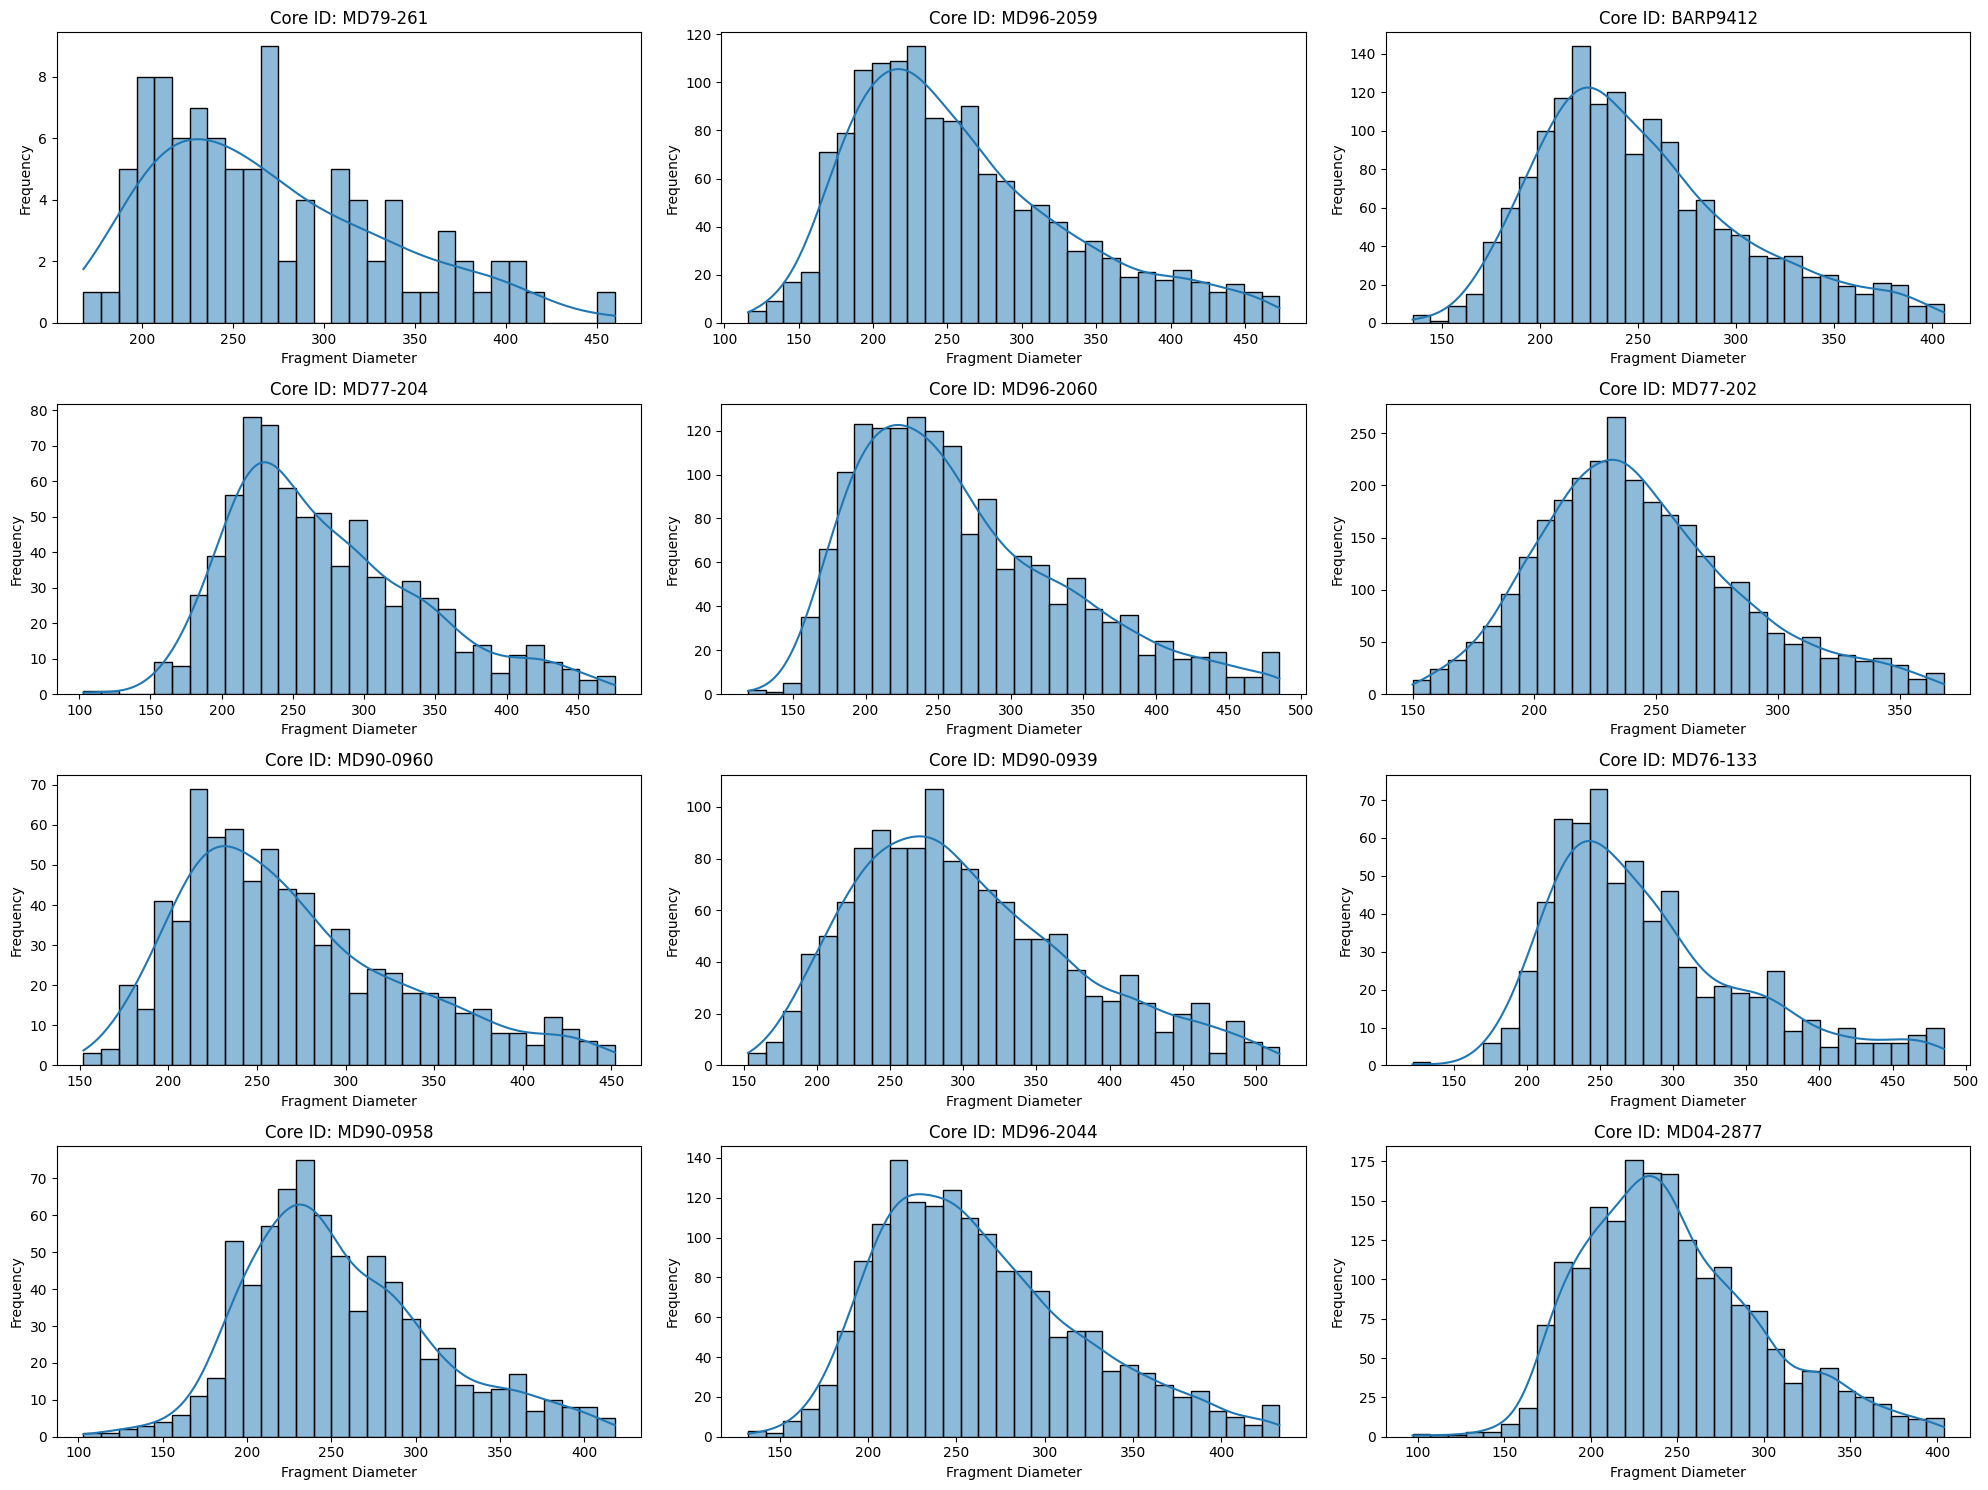

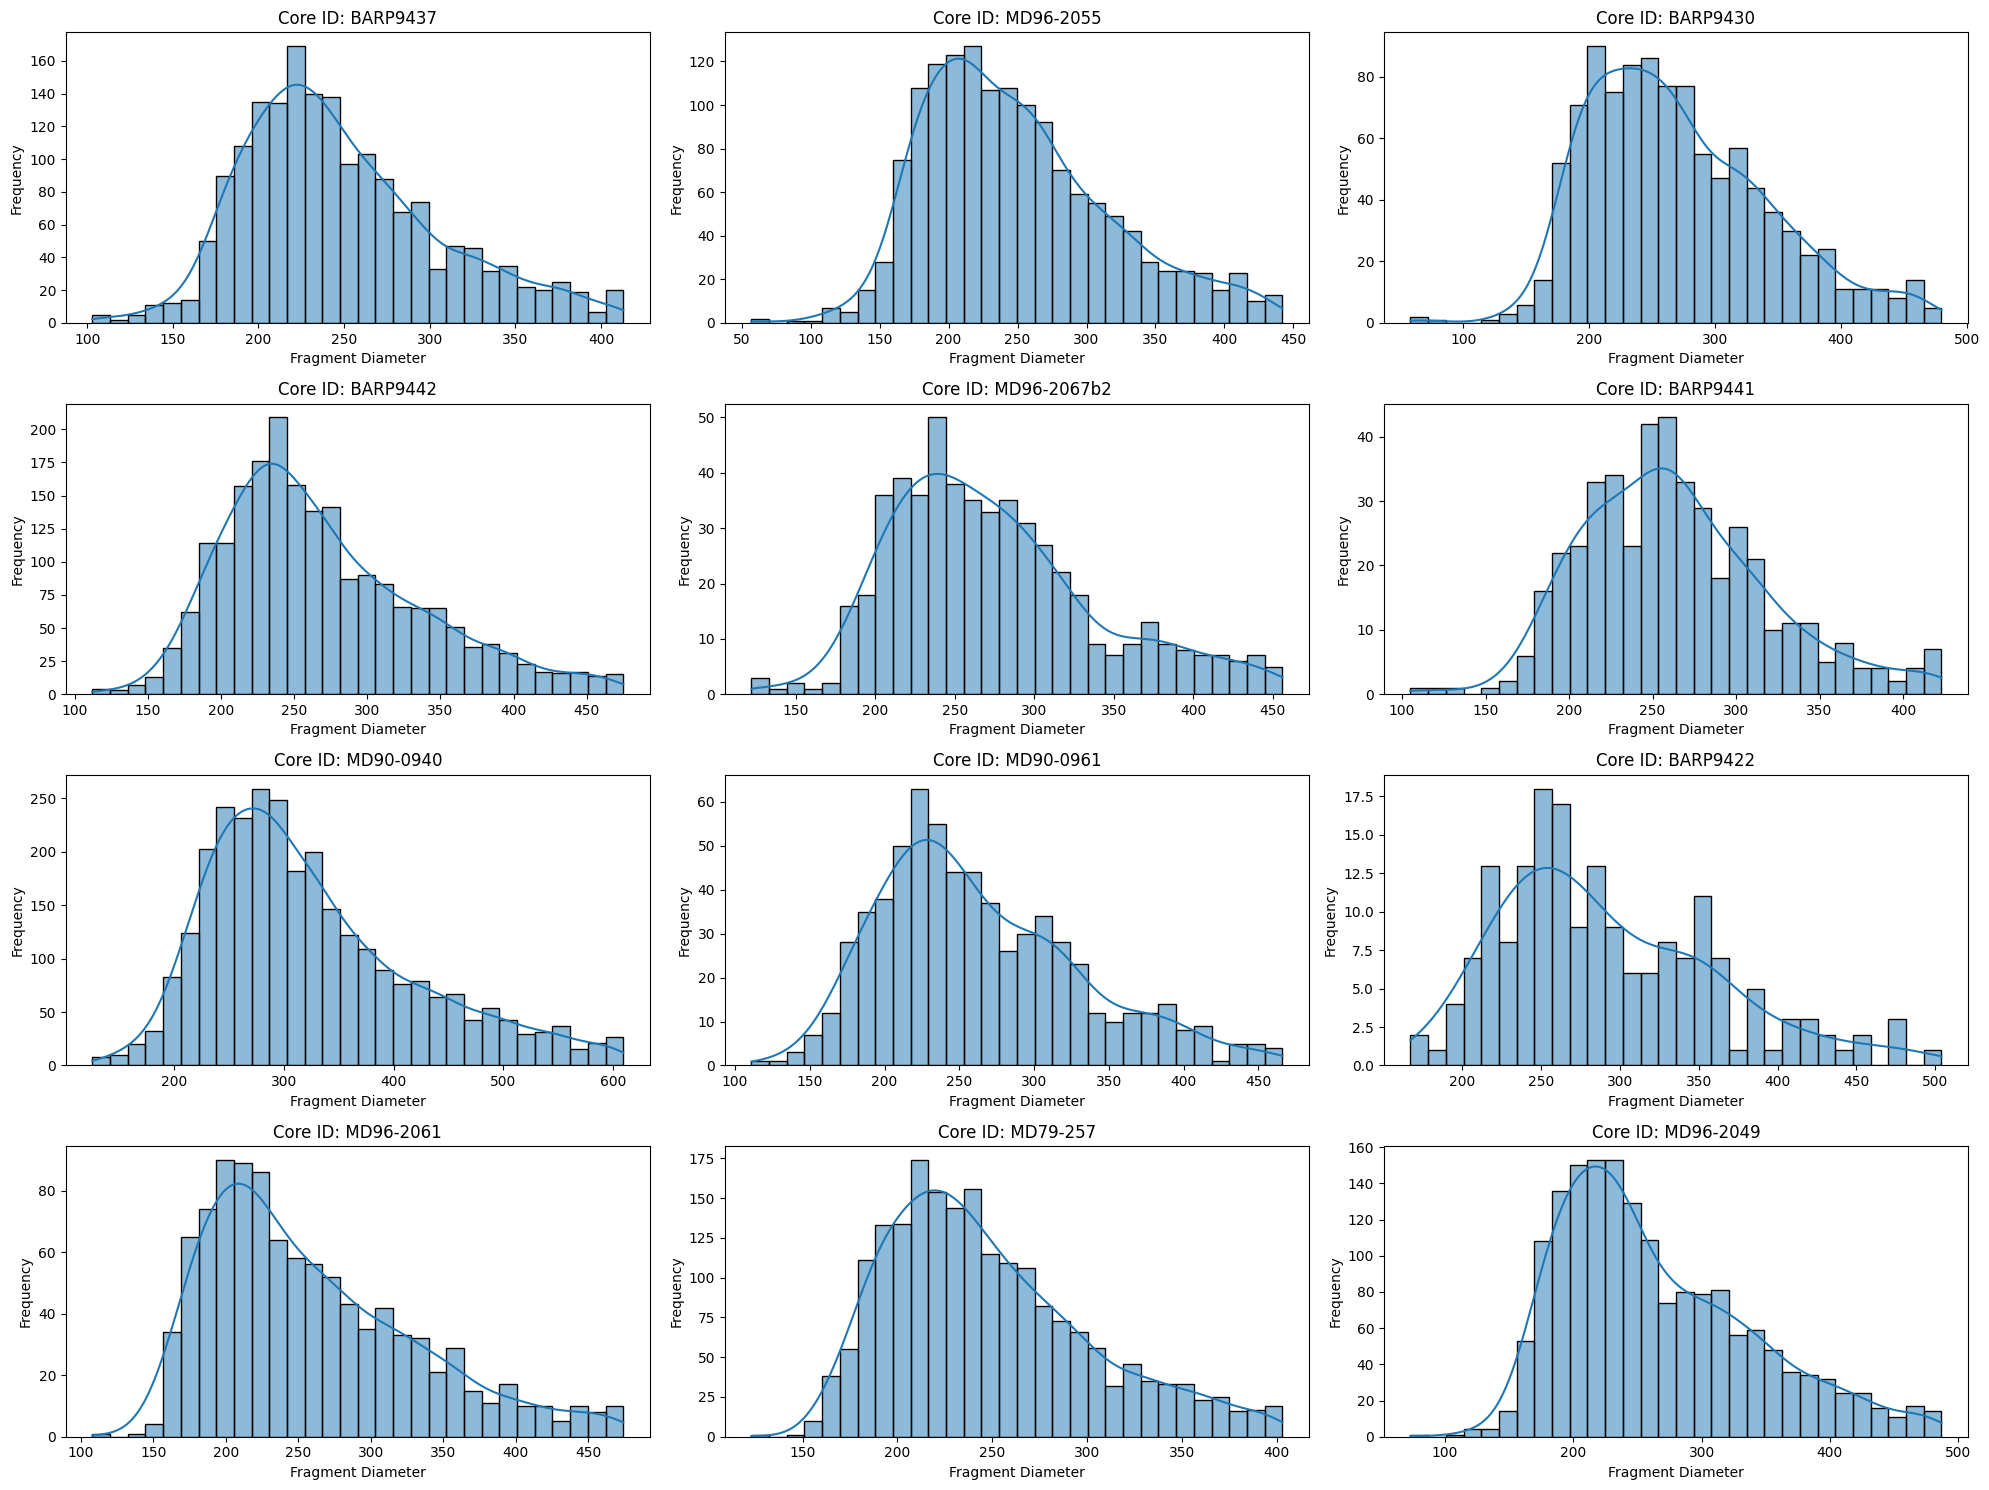

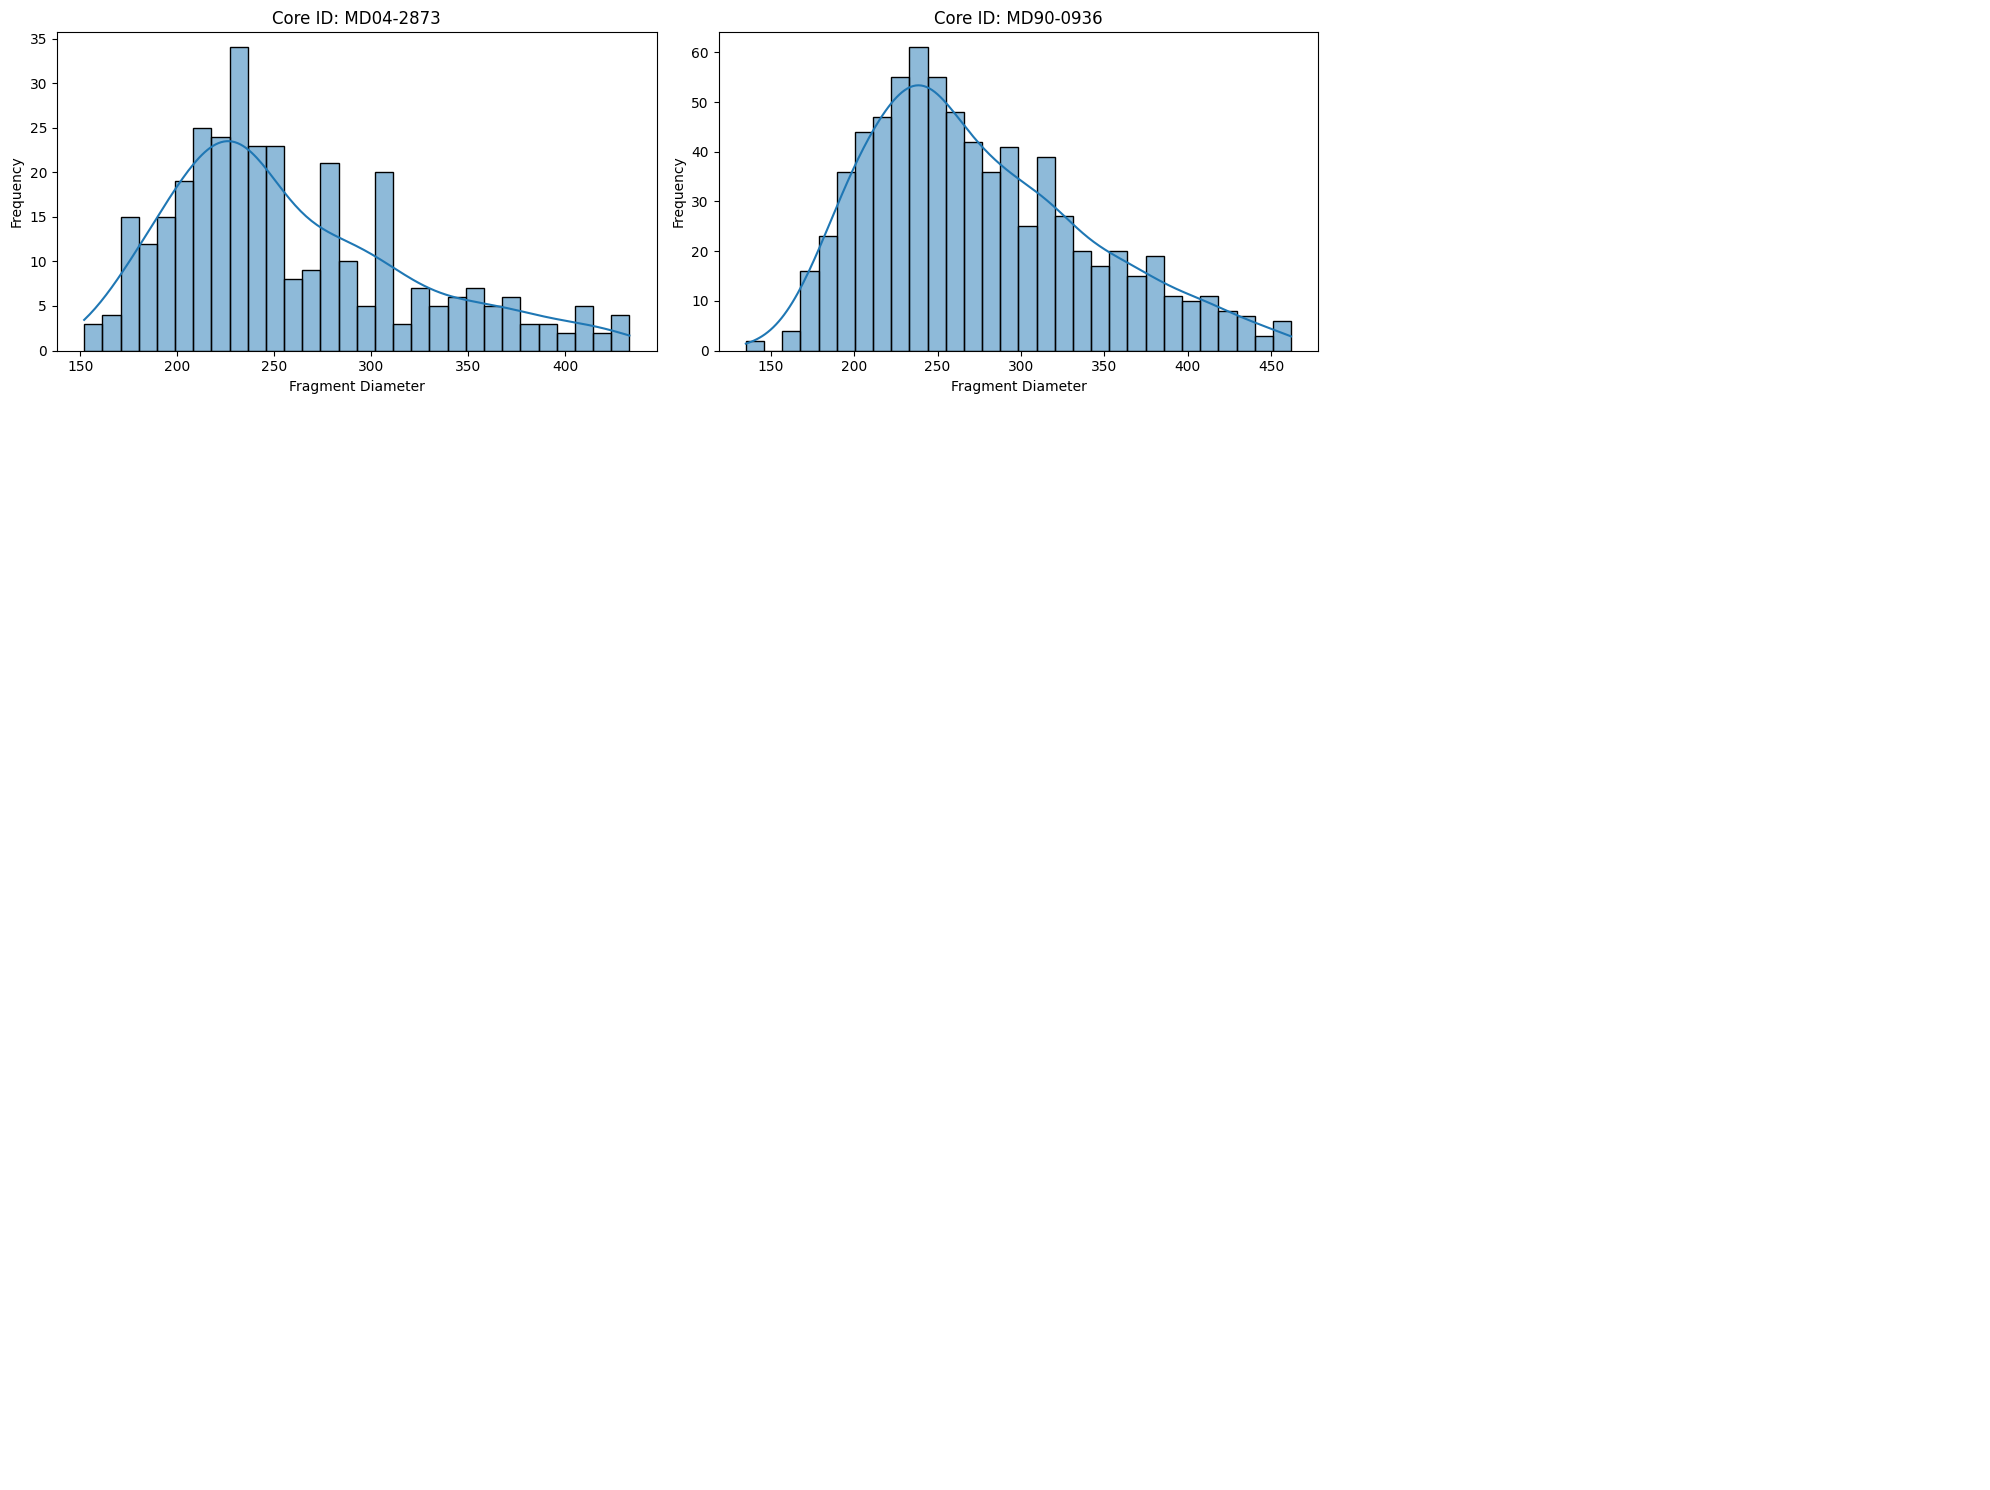

In [21]:
def plot_fragment_size_distribution(frag_no_outlier_grouped, common_core_ids, subplots_per_plot=12):
    """
    Plots the fragment size distribution for each core_id in common_core_ids.
    
    Parameters:
    - frag_no_outlier_grouped: DataFrameGroupBy object containing the grouped fragment data.
    - common_core_ids: List of core IDs to plot.
    - subplots_per_plot: Number of subplots per plot (default is 12).
    """
    
    # Total number of core IDs
    total_core_ids = len(common_core_ids)

    # Number of plots needed
    num_plots = (total_core_ids + subplots_per_plot - 1) // subplots_per_plot

    # Iterate through each plot
    for plot_idx in range(num_plots):
        # Create a figure with subplots
        fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))  # Adjust the grid size as needed
        axes = axes.flatten()
        
        # Iterate through each subplot
        for subplot_idx in range(subplots_per_plot):
            core_idx = plot_idx * subplots_per_plot + subplot_idx
            if core_idx < total_core_ids:
                core_id = common_core_ids[core_idx]
                fragment_data = frag_no_outlier_grouped.get_group(core_id)
                
                # Plot the fragment size distribution in the current subplot
                sns.histplot(fragment_data['Diameter'], bins=30, kde=True, ax=axes[subplot_idx])
                axes[subplot_idx].set_title(f'Core ID: {core_id}')
                axes[subplot_idx].set_xlabel('Fragment Diameter')
                axes[subplot_idx].set_ylabel('Frequency')
            else:
                # Hide any unused subplots
                axes[subplot_idx].axis('off')
        
        # Adjust layout and show the plot
        plt.tight_layout()
        plt.show()
        # Optionally, save the plot
        # plt.savefig(f'fragment_size_distribution_plot_{plot_idx + 1}.png')


# Get common core ids
common_core_ids = list(set(df_foram['core_id'].unique()) & set(df_fragment['core_id'].unique()))

# Assuming frag_no_outlier_grouped is a DataFrameGroupBy object and common_core_ids is a list of core IDs
plot_fragment_size_distribution(frag_no_outlier_grouped, common_core_ids)

### Fragment Fractal Models

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_34421/1130848436.py:5: RuntimeWarning: overflow encountered in exp
  return c * (x ** -alpha) * np.exp(-beta * x)
/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_34421/1130848436.py:5: RuntimeWarning: overflow encountered in power
  return c * (x ** -alpha) * np.exp(-beta * x)


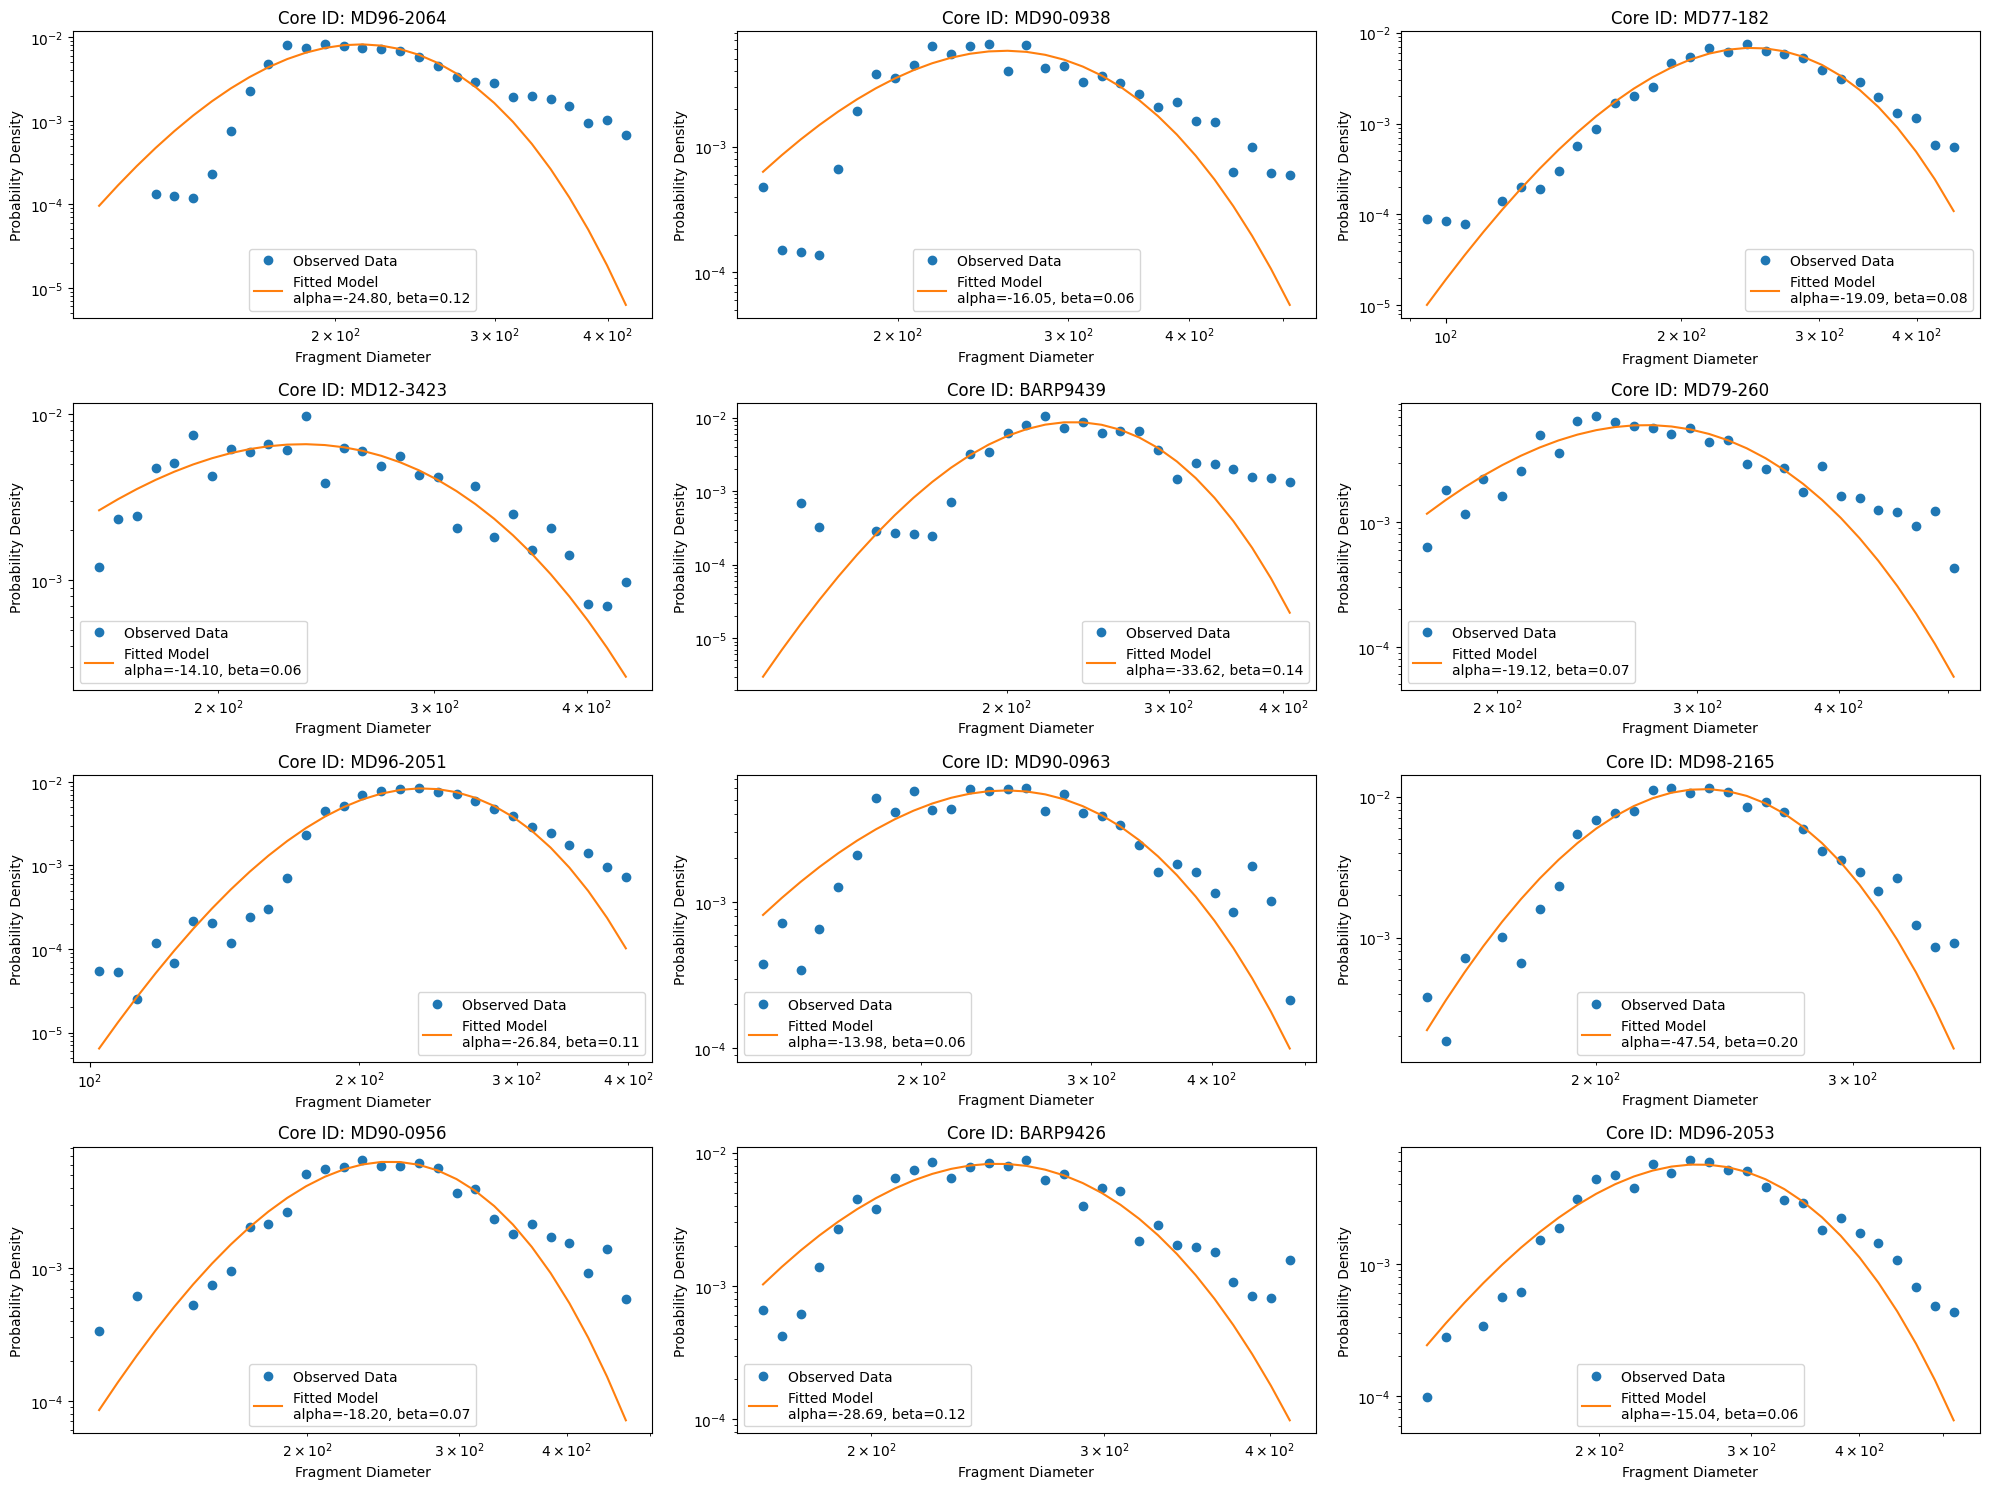

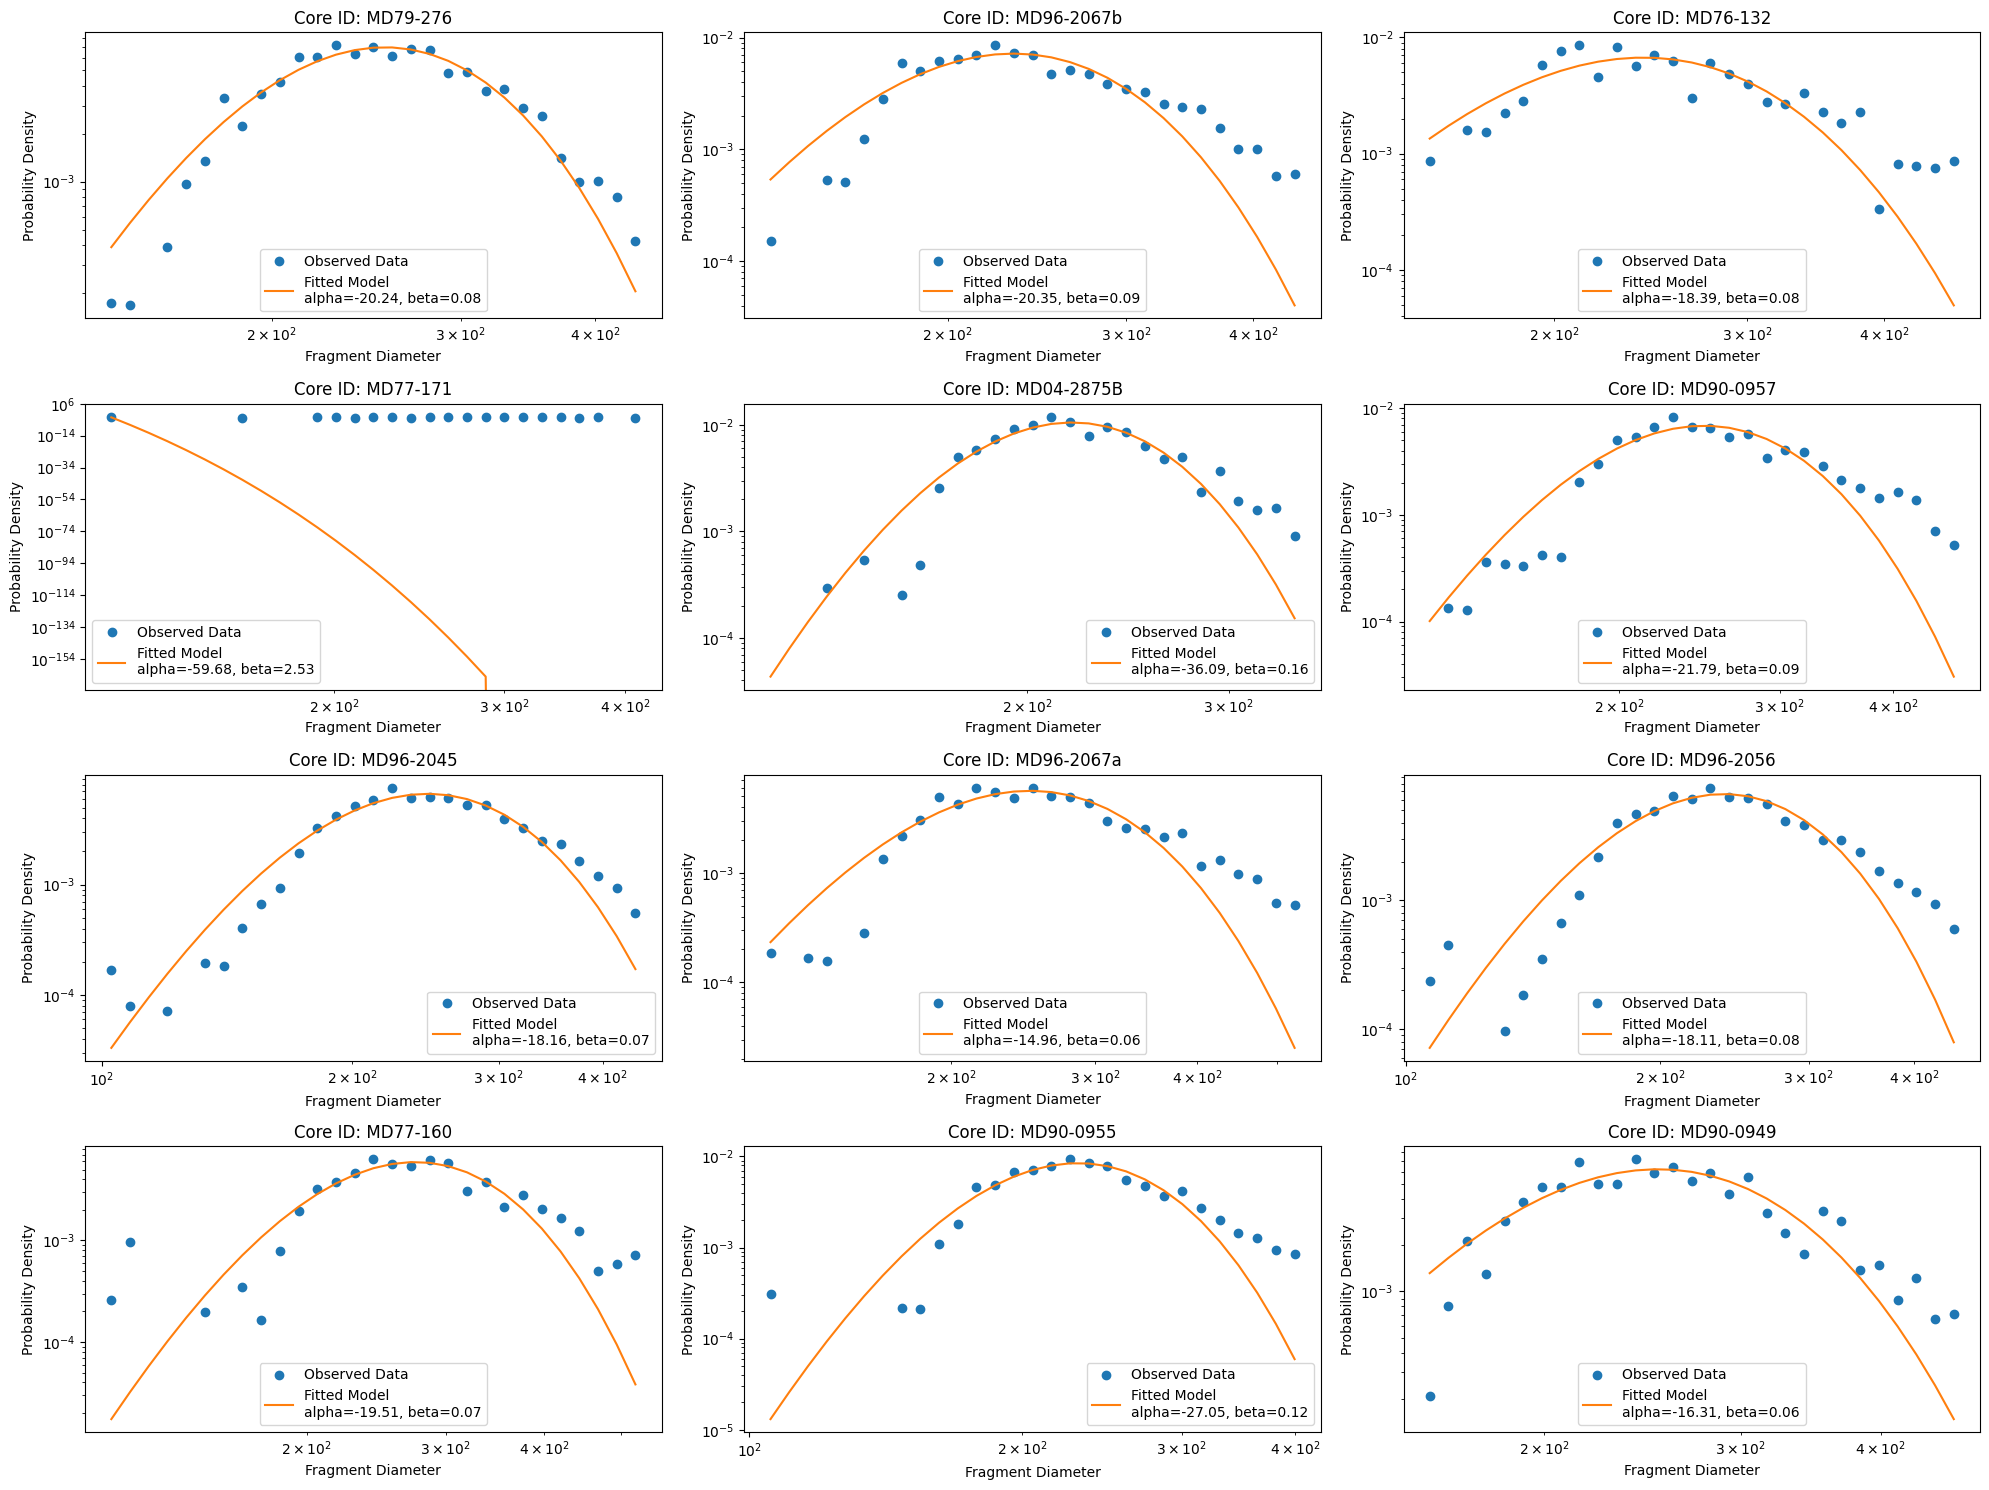

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_34421/1130848436.py:5: RuntimeWarning: invalid value encountered in multiply
  return c * (x ** -alpha) * np.exp(-beta * x)


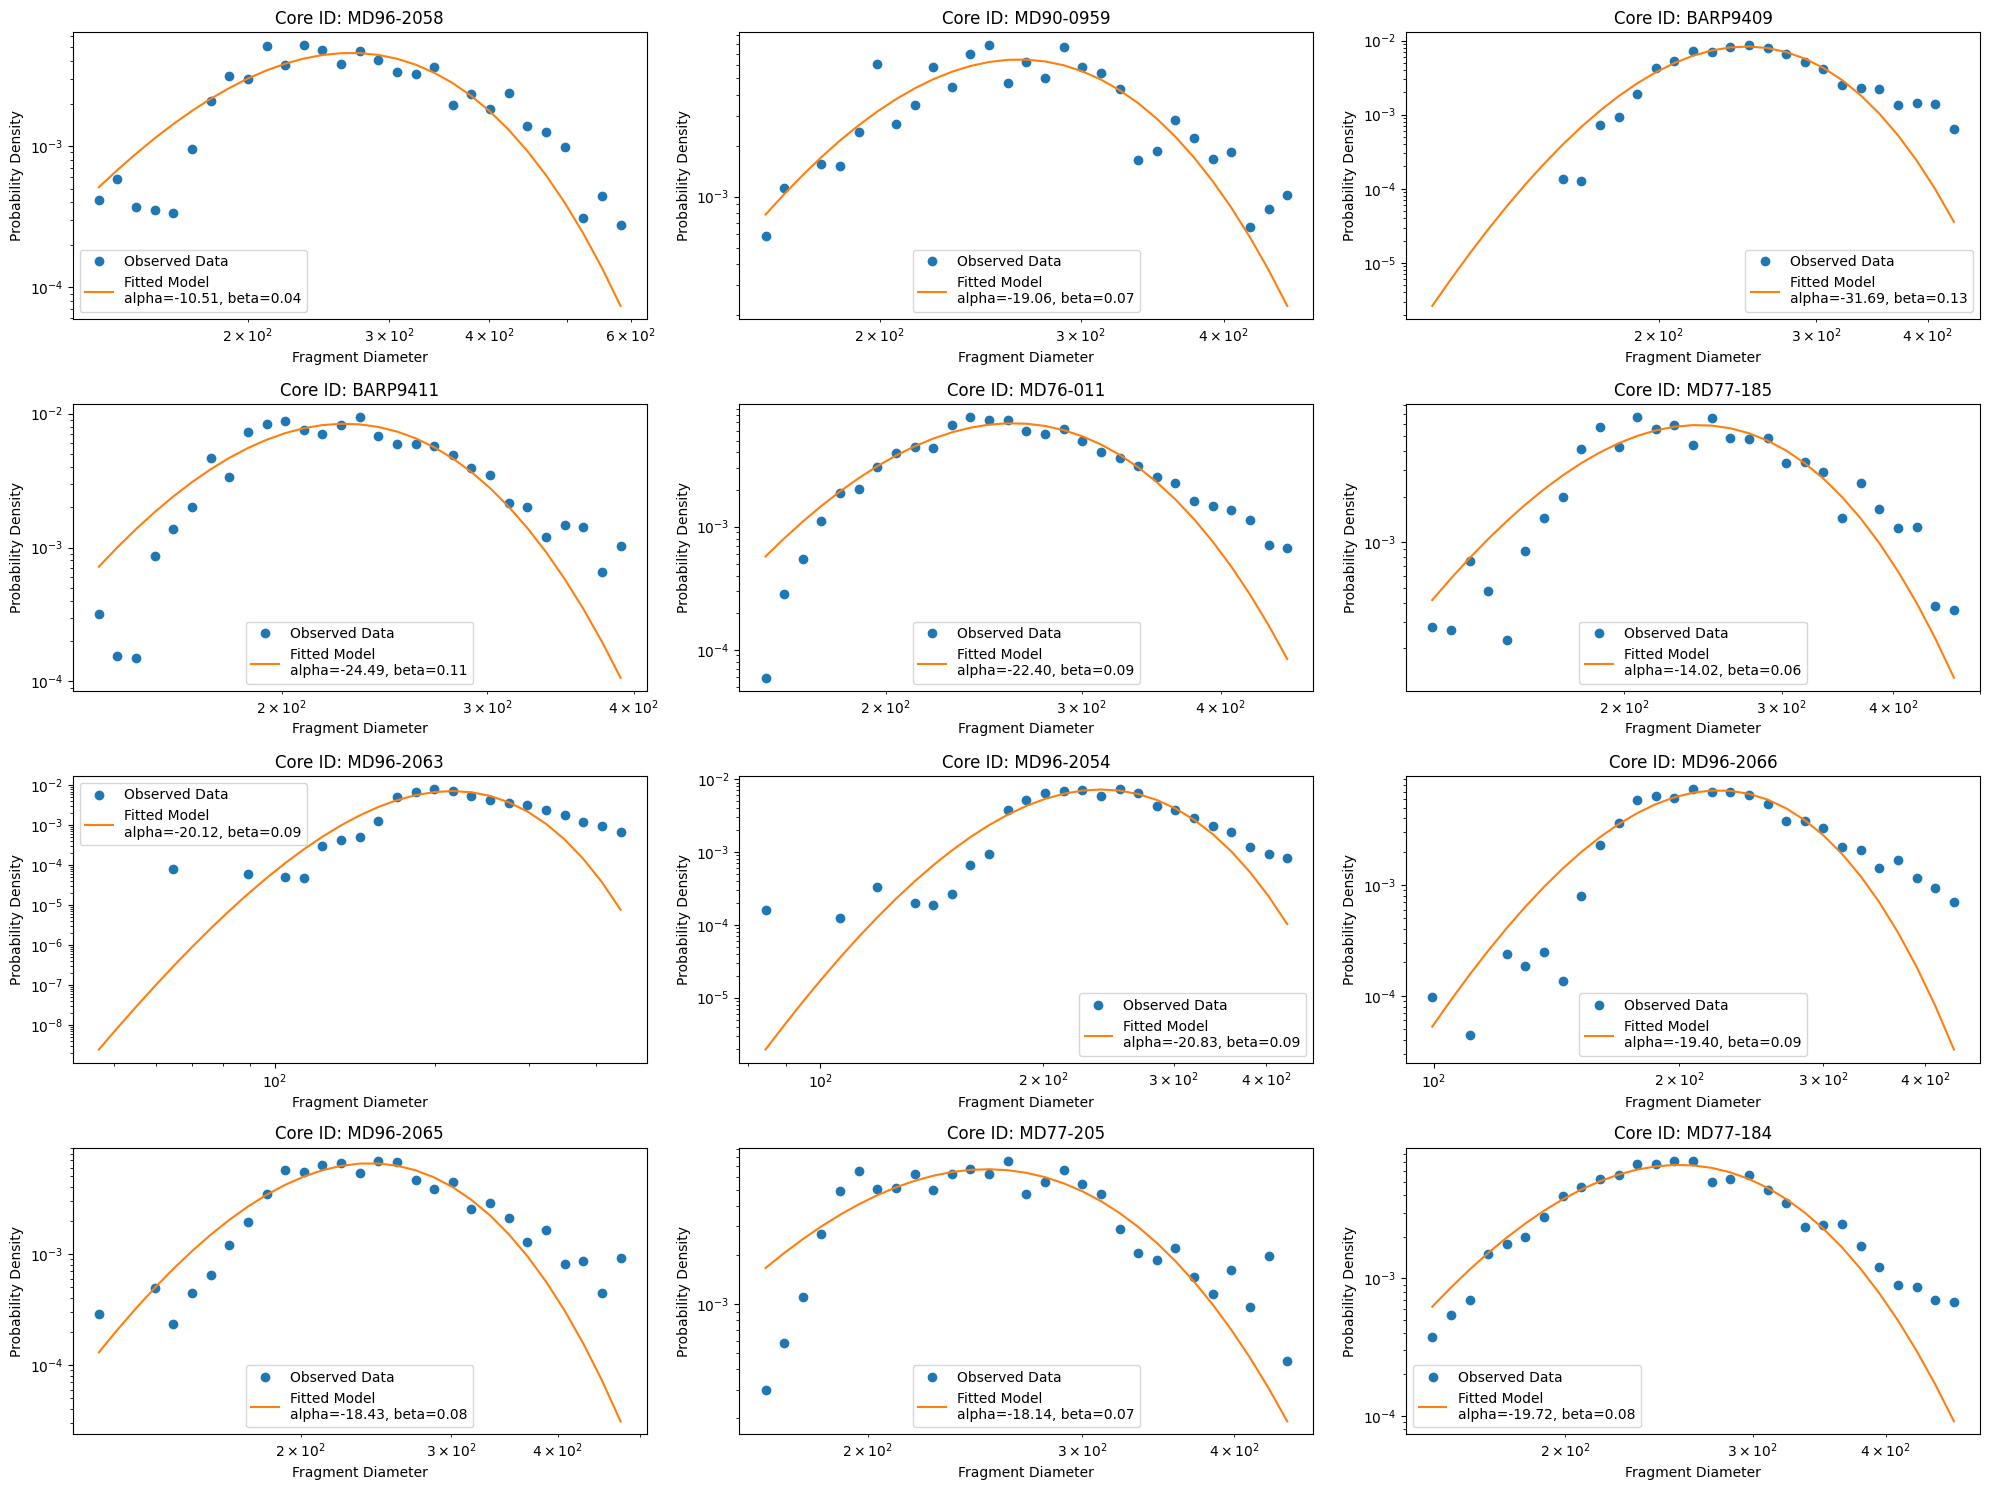

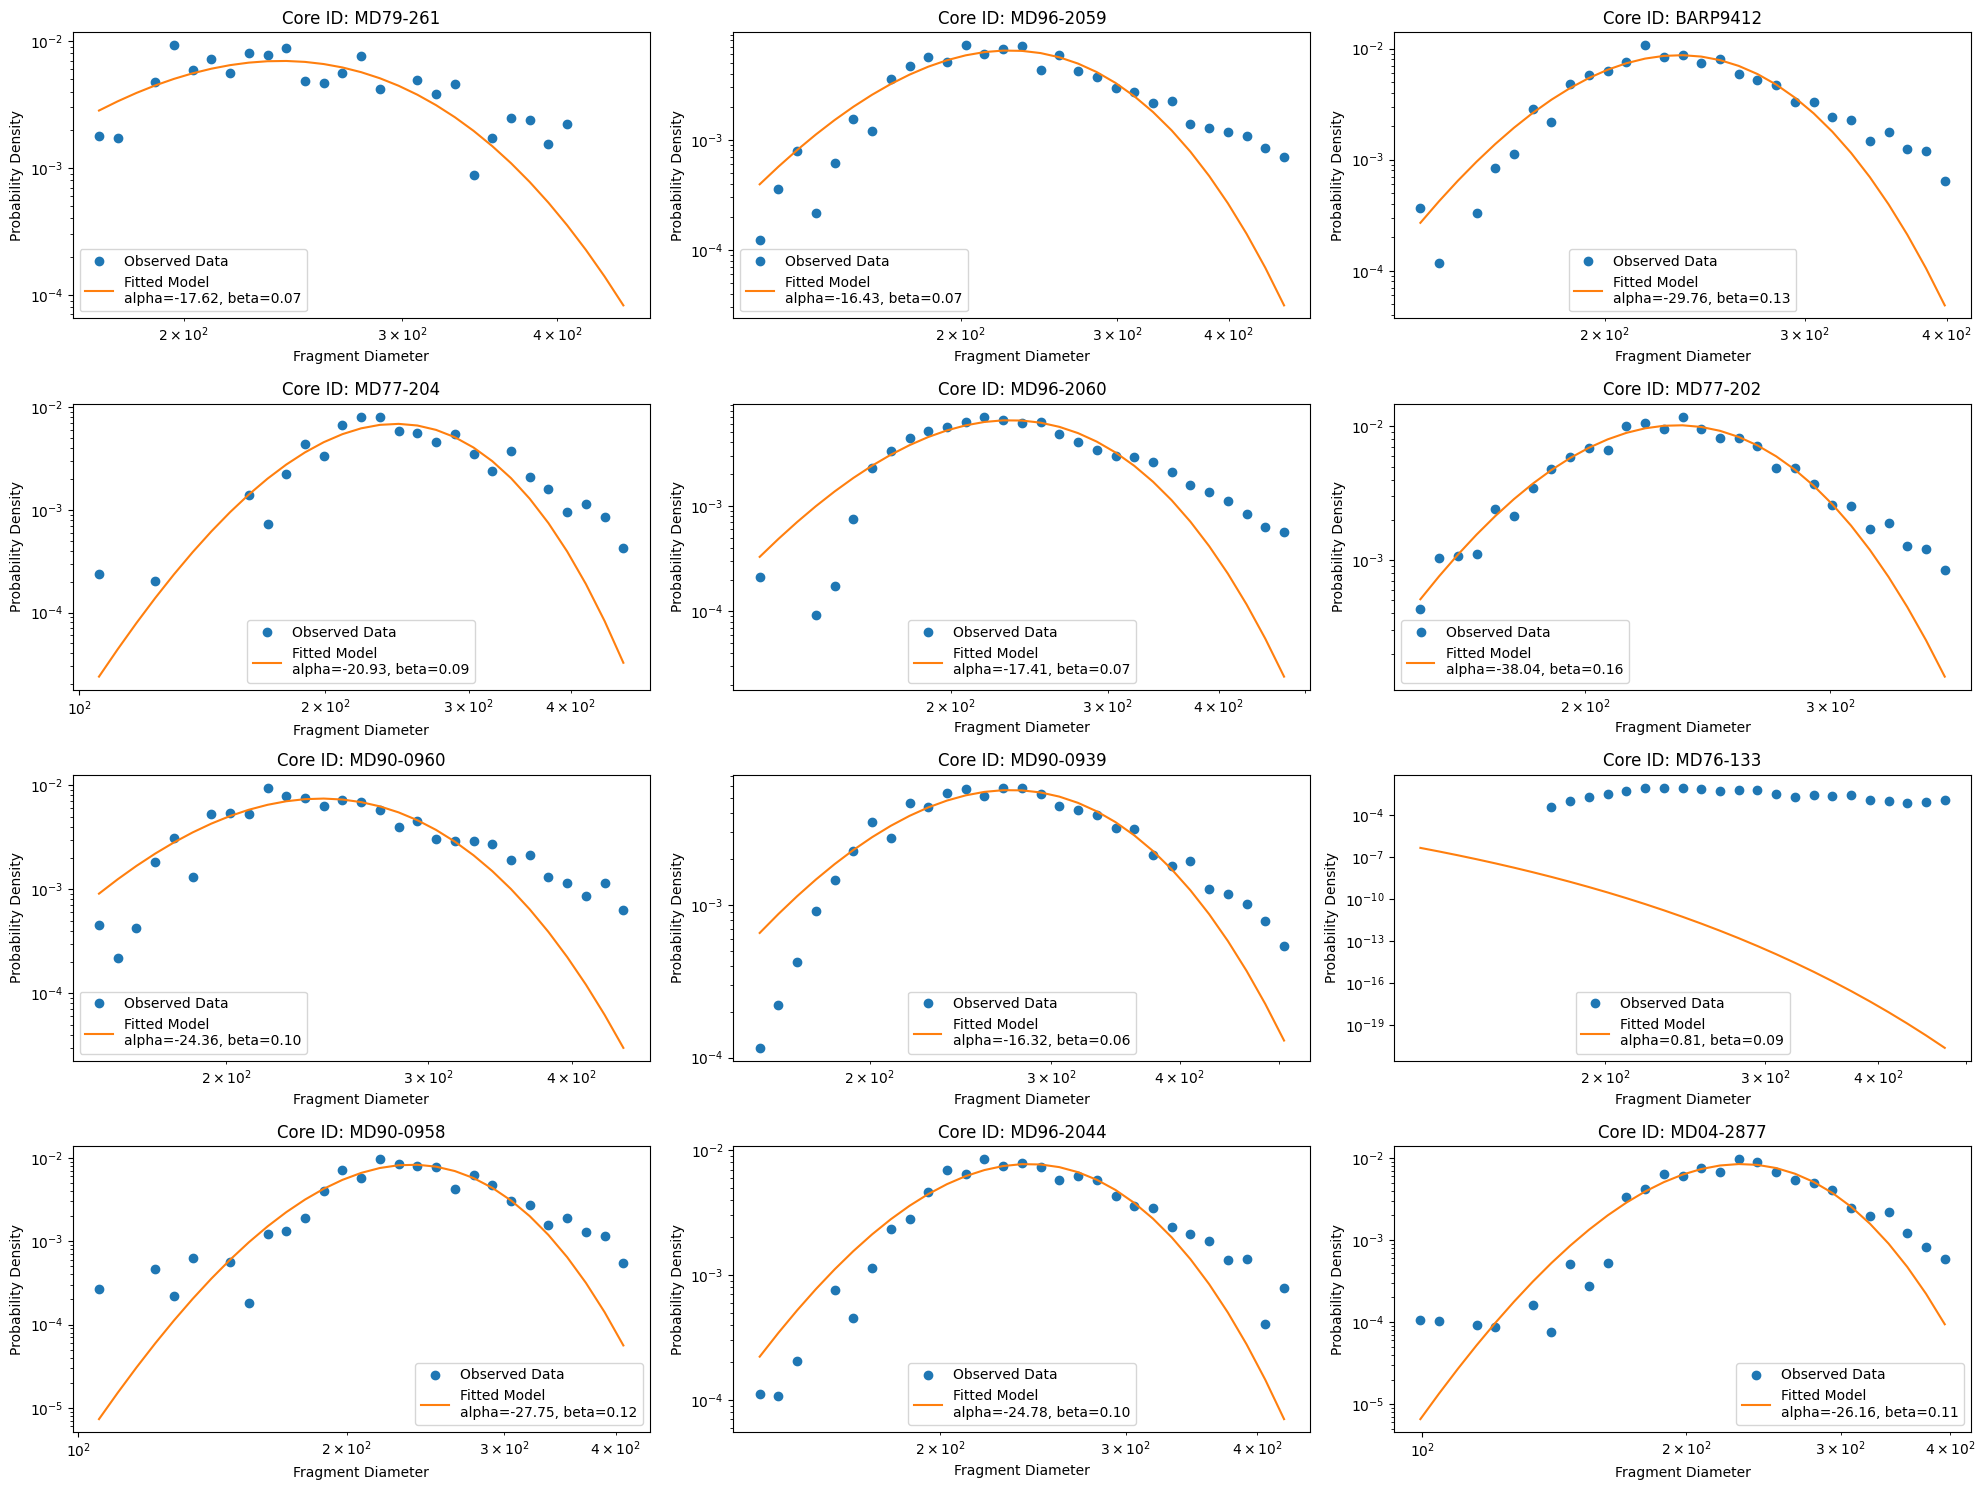

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_34421/1130848436.py:5: RuntimeWarning: overflow encountered in multiply
  return c * (x ** -alpha) * np.exp(-beta * x)


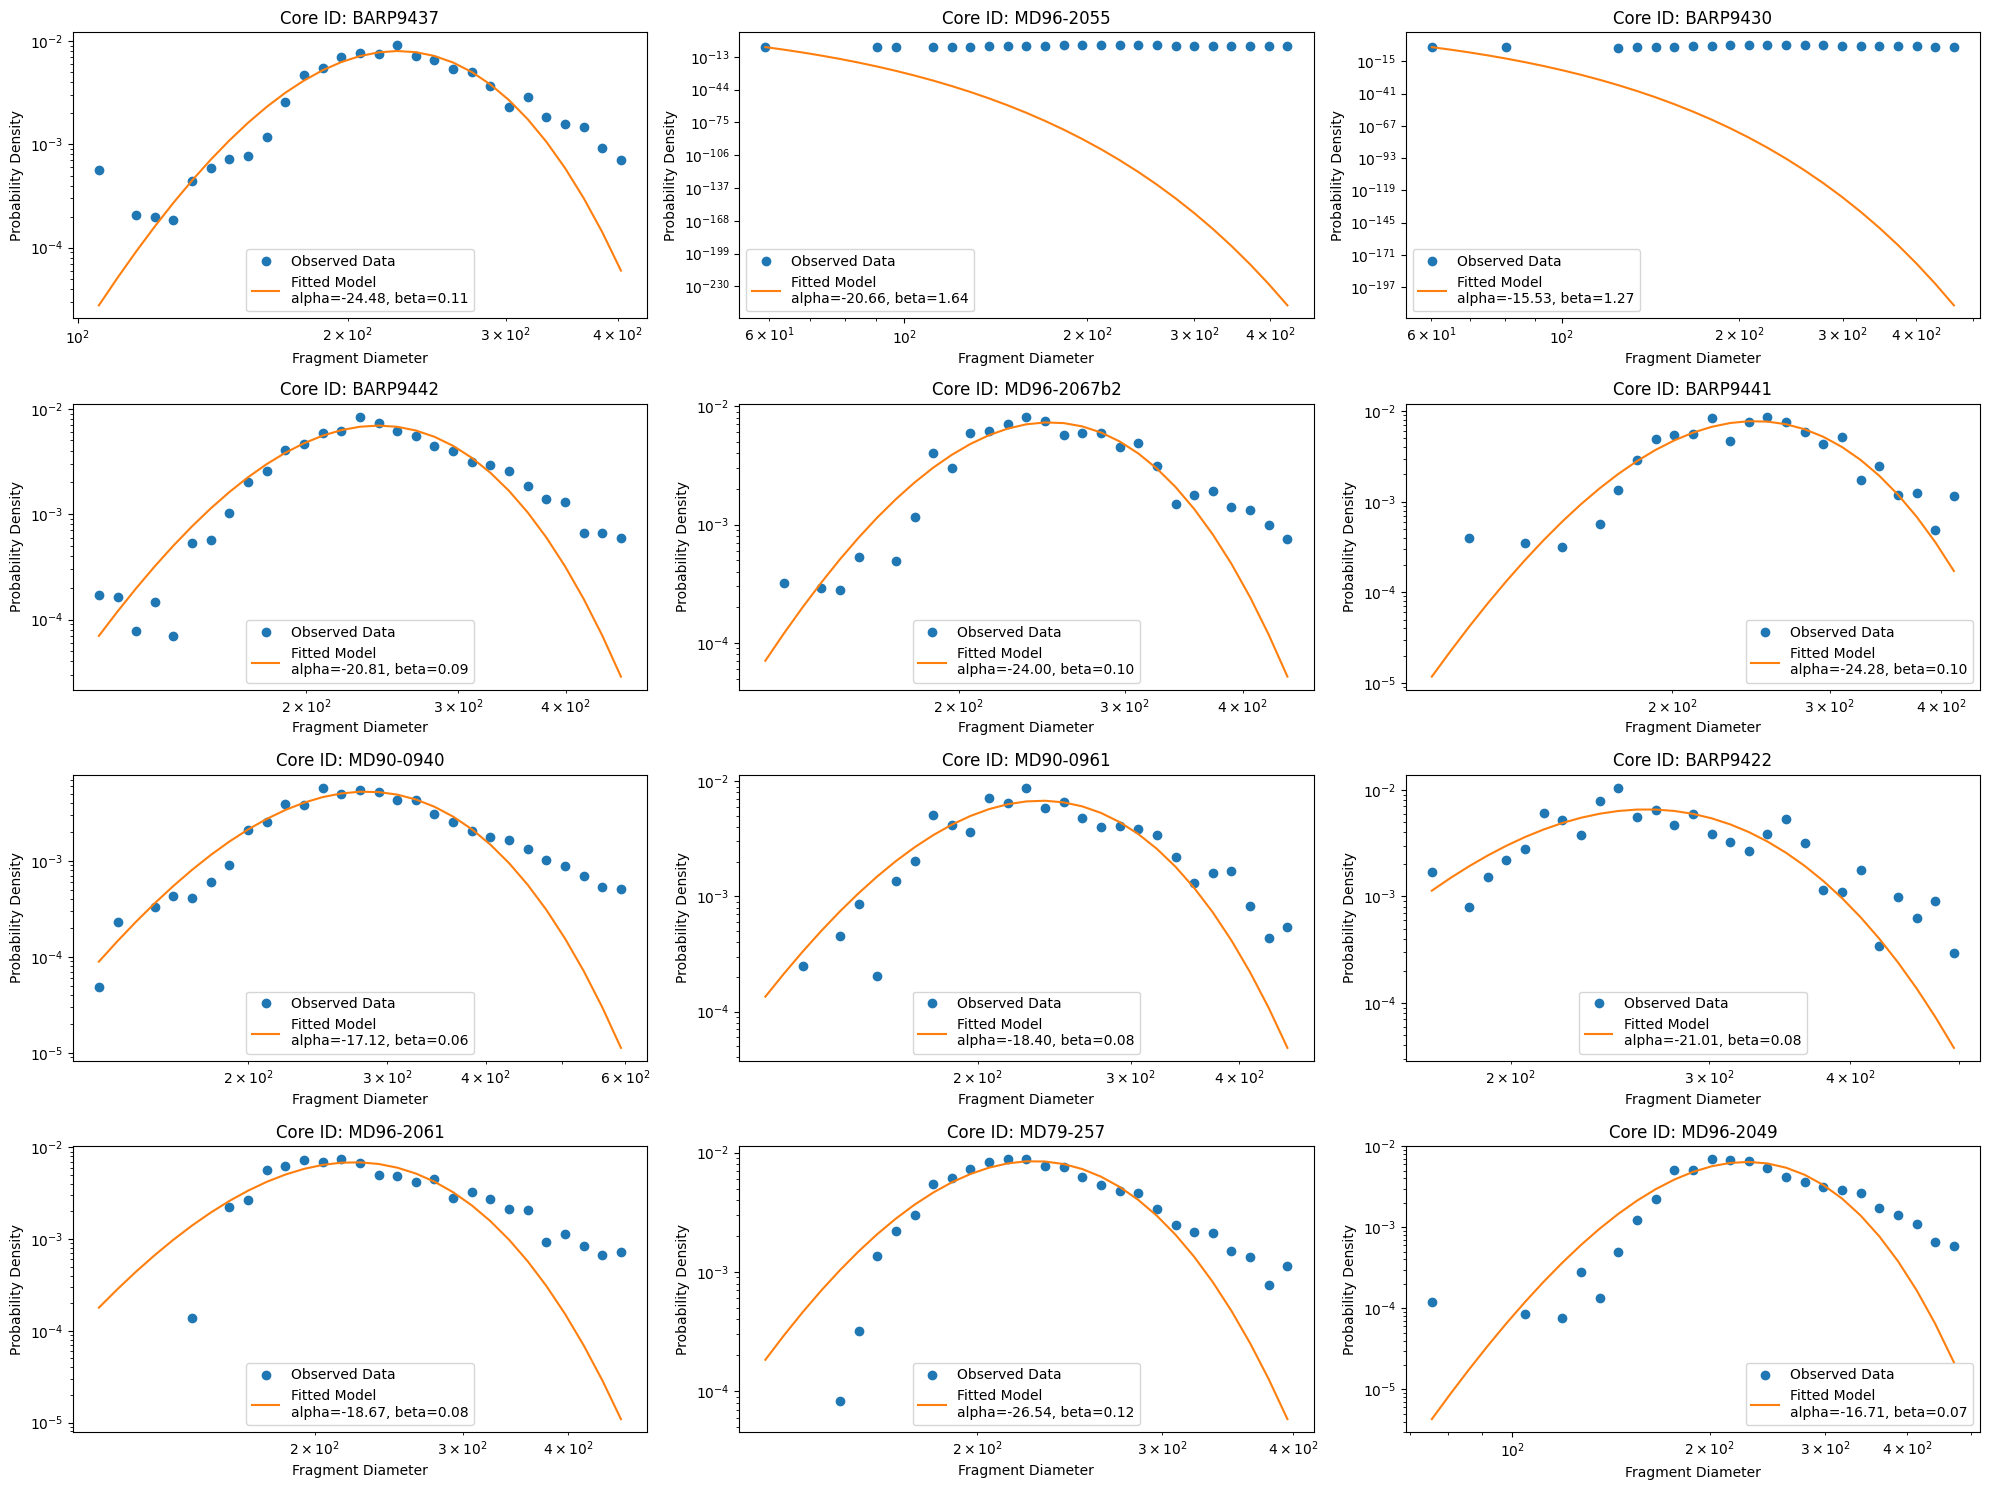

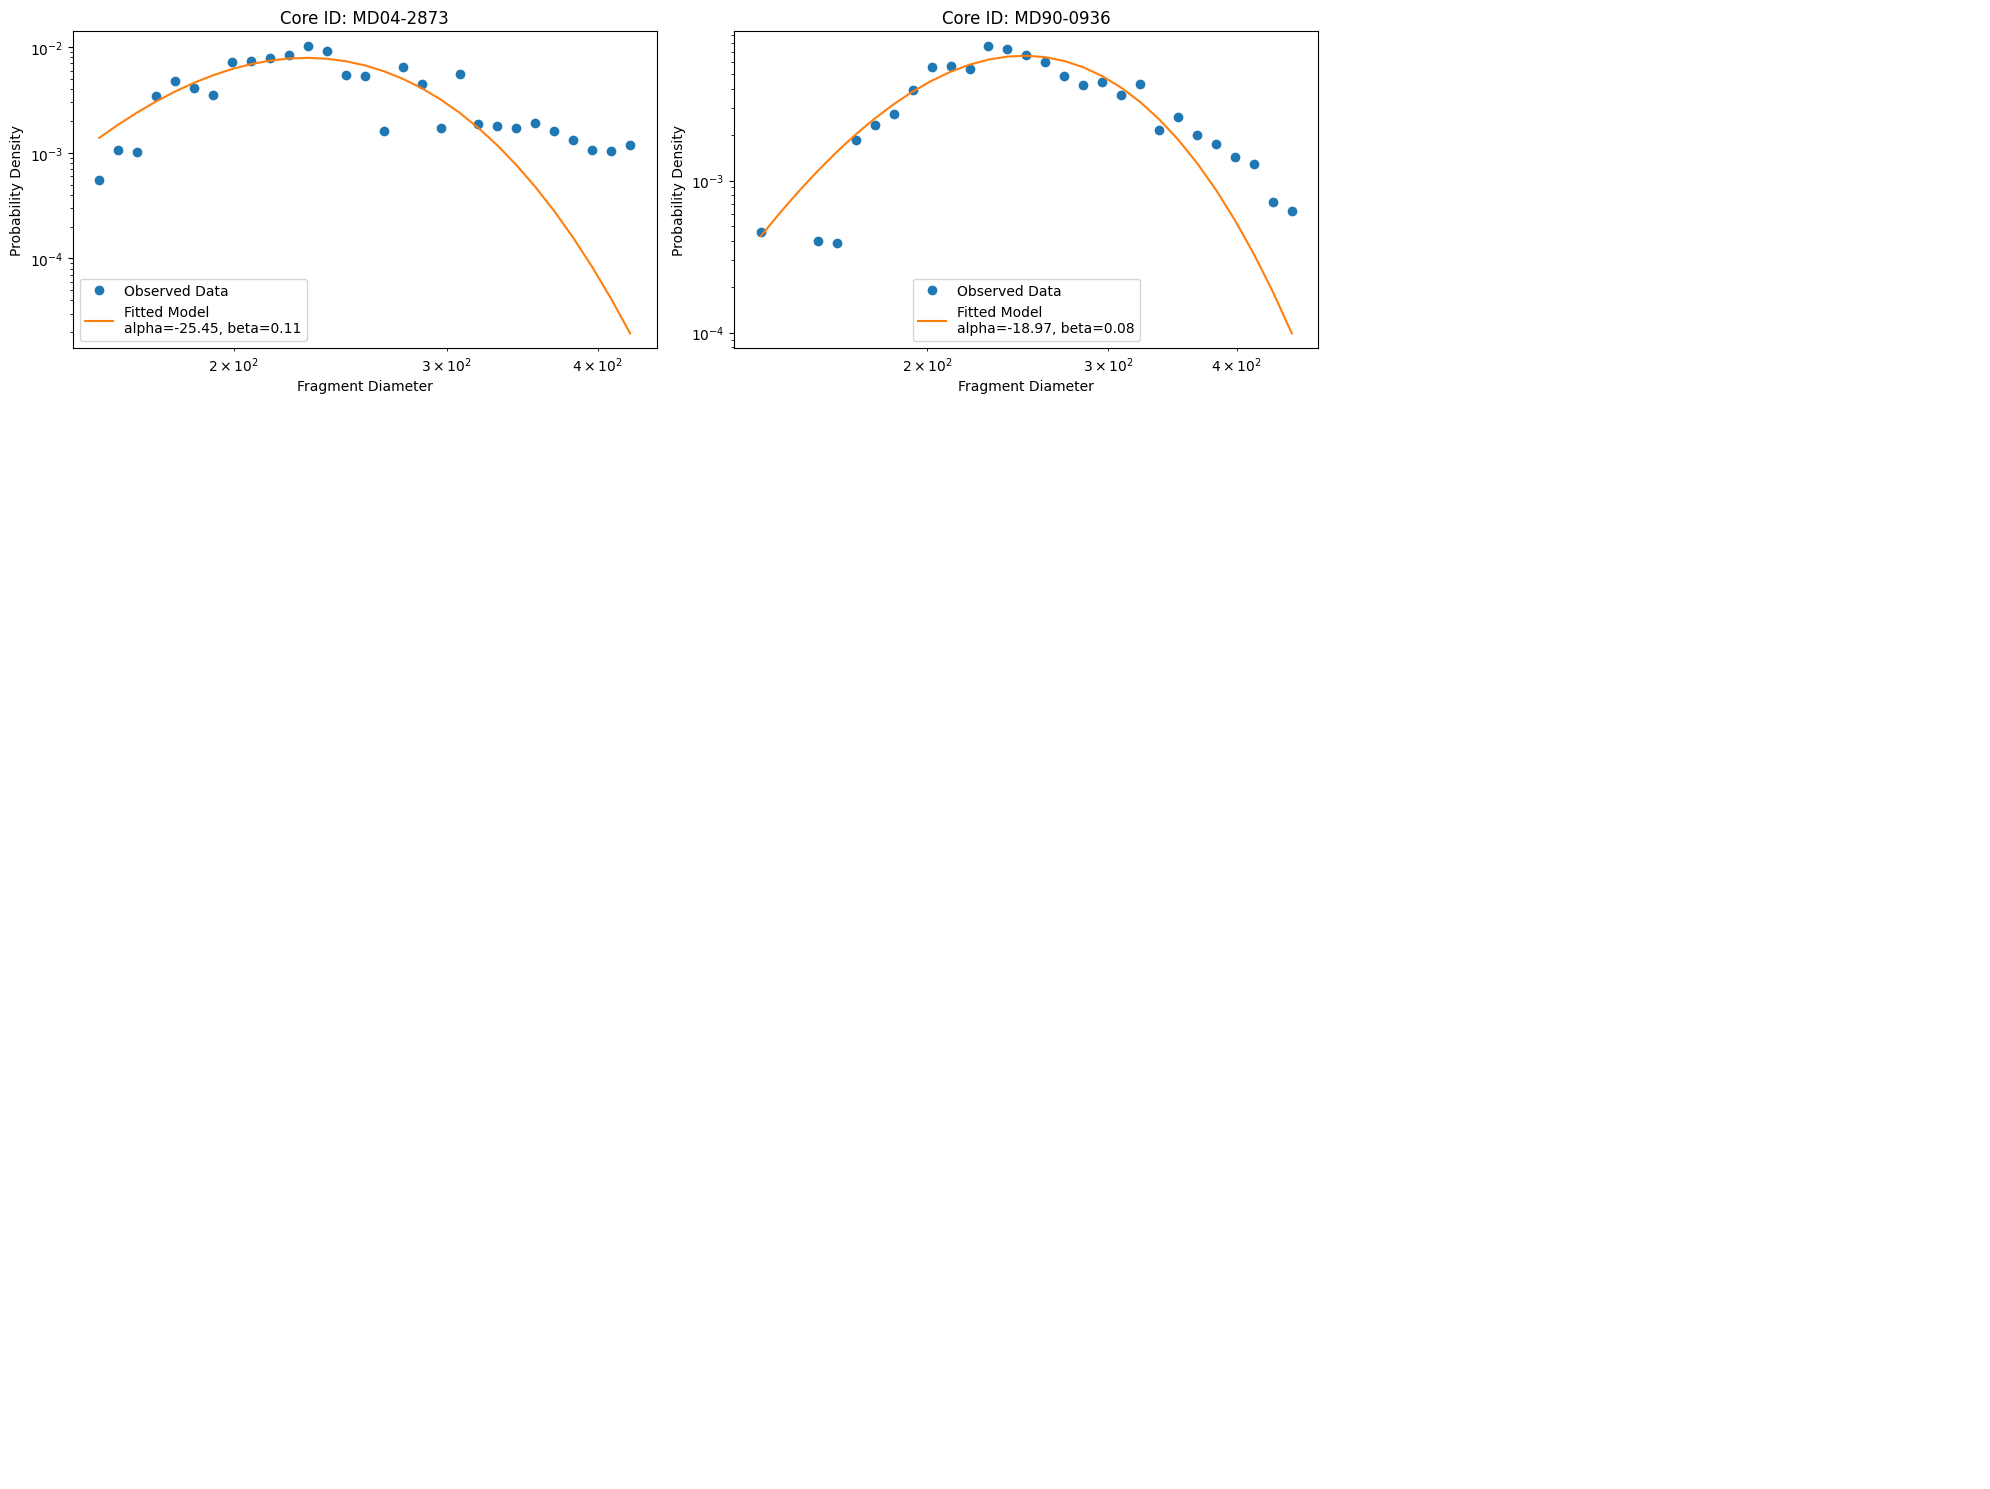

        Core ID      Alpha      Beta
0     MD96-2064 -24.800059  0.116314
1     MD90-0938 -16.053934  0.062156
2      MD77-182 -19.094018  0.077525
3     MD12-3423 -14.095055  0.060115
4      BARP9439 -33.622183  0.142281
5      MD79-260 -19.116017  0.070689
6     MD96-2051 -26.840740  0.113985
7     MD90-0963 -13.982205  0.057057
8     MD98-2165 -47.543768  0.200487
9     MD90-0956 -18.204009  0.072886
10     BARP9426 -28.689328  0.115217
11    MD96-2053 -15.038397  0.057754
12     MD79-276 -20.244363  0.079420
13   MD96-2067b -20.347793  0.087612
14     MD76-132 -18.385484  0.076194
15     MD77-171 -59.675240  2.526911
16   MD04-2875B -36.085941  0.164885
17    MD90-0957 -21.791071  0.087879
18    MD96-2045 -18.157425  0.073684
19   MD96-2067a -14.959702  0.059892
20    MD96-2056 -18.108650  0.076074
21     MD77-160 -19.512952  0.071081
22    MD90-0955 -27.051262  0.117351
23    MD90-0949 -16.309463  0.064448
24    MD96-2058 -10.510314  0.039074
25    MD90-0959 -19.058695  0.071948
2

In [22]:
from scipy.optimize import curve_fit

# Define the Power-Law with Exponential Cutoff function
def power_law_exponential_cutoff(x, alpha, beta, c):
    return c * (x ** -alpha) * np.exp(-beta * x)

# Function to fit the model to the data and plot the results
def fit_power_law_exponential_cutoff(fragment_data):
    # Extract the fragment sizes
    fragment_sizes = fragment_data['Diameter'].values
    
    # Define the bins for the histogram
    bins = np.logspace(np.log10(fragment_sizes.min()), np.log10(fragment_sizes.max()), 30)
    
    # Compute the histogram
    hist, bin_edges = np.histogram(fragment_sizes, bins=bins, density=True)
    
    # Compute the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit the model to the data
    popt, pcov = curve_fit(power_law_exponential_cutoff, bin_centers, hist, p0=[1.0, 0.1, 1.0], maxfev=10000)
    
    # Extract the fitted parameters
    alpha, beta, c = popt
    
    return bin_centers, hist, alpha, beta, c

# Function to create subplots for multiple core IDs
def plot_multiple_cores(frag_no_outlier_grouped, common_core_ids, subplots_per_plot=12):
    # Total number of core IDs
    total_core_ids = len(common_core_ids)

    # Number of plots needed
    num_plots = (total_core_ids + subplots_per_plot - 1) // subplots_per_plot

    # List to store alpha and beta values
    alpha_beta_values = []

    # Iterate through each plot
    for plot_idx in range(num_plots):
        # Create a figure with subplots
        fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))  # Adjust the grid size as needed
        axes = axes.flatten()
        
        # Iterate through each subplot
        for subplot_idx in range(subplots_per_plot):
            core_idx = plot_idx * subplots_per_plot + subplot_idx
            if core_idx < total_core_ids:
                core_id = common_core_ids[core_idx]
                fragment_data = frag_no_outlier_grouped.get_group(core_id)
                
                # Fit the model to the data
                bin_centers, hist, alpha, beta, c = fit_power_law_exponential_cutoff(fragment_data)
                
                # Store the alpha and beta values
                alpha_beta_values.append({'Core ID': core_id, 'Alpha': alpha, 'Beta': beta})

                # Plot the observed data and the fitted model in the current subplot
                axes[subplot_idx].loglog(bin_centers, hist, 'o', label='Observed Data')
                axes[subplot_idx].loglog(bin_centers, power_law_exponential_cutoff(bin_centers, alpha, beta, c), '-', label=f'Fitted Model\nalpha={alpha:.2f}, beta={beta:.2f}')
                axes[subplot_idx].set_title(f'Core ID: {core_id}')
                axes[subplot_idx].set_xlabel('Fragment Diameter')
                axes[subplot_idx].set_ylabel('Probability Density')
                axes[subplot_idx].legend()
            else:
                # Hide any unused subplots
                axes[subplot_idx].axis('off')
        
        # Adjust layout and show the plot
        plt.tight_layout()
        plt.show()
        # Optionally, save the plot
        # plt.savefig(f'fragment_size_distribution_plot_{plot_idx + 1}.png')

    alpha_beta_df = pd.DataFrame(alpha_beta_values)
    return alpha_beta_df

# Get common core ids
common_core_ids = list(set(df_foram['core_id'].unique()) & set(df_fragment['core_id'].unique()))

# Assuming frag_no_outlier_grouped is a DataFrameGroupBy object and common_core_ids is a list of core IDs
alpha_beta_df  = plot_multiple_cores(frag_no_outlier_grouped, common_core_ids)

# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame with alpha and beta values
print(alpha_beta_df)

In [23]:
alpha_beta_df.sort_values(by=['Alpha', 'Beta'])

Core ID      Alpha      Beta
15     MD77-171 -59.675240  2.526911
8     MD98-2165 -47.543768  0.200487
41     MD77-202 -38.038229  0.163262
16   MD04-2875B -36.085941  0.164885
4      BARP9439 -33.622183  0.142281
26     BARP9409 -31.693948  0.126400
38     BARP9412 -29.763404  0.127875
10     BARP9426 -28.689328  0.115217
45    MD90-0958 -27.746896  0.117290
22    MD90-0955 -27.051262  0.117351
6     MD96-2051 -26.840740  0.113985
58     MD79-257 -26.540595  0.117153
47    MD04-2877 -26.162899  0.113199
60    MD04-2873 -25.450741  0.110839
0     MD96-2064 -24.800059  0.116314
46    MD96-2044 -24.781504  0.102145
27     BARP9411 -24.490918  0.108145
48     BARP9437 -24.475254  0.107584
42    MD90-0960 -24.362528  0.100605
53     BARP9441 -24.282491  0.098146
52  MD96-2067b2 -23.997345  0.096122
28     MD76-011 -22.402200  0.086099
17    MD90-0957 -21.791071  0.087879
56     BARP9422 -21.007201  0.079556
39     MD77-204 -20.928647  0.085537
31    MD96-2054 -20.826218  0.087003
51     BARP9442 -20.810424  0.085831
49    MD96-2055 -20.660047  1.639543
13   MD96-2067b -20.347793  0.087612
12     MD79-276 -20.244363  0.079420
30    MD96-2063 -20.119371  0.093577
35     MD77-184 -19.723482  0.077071
21     MD77-160 -19.512952  0.071081
32    MD96-2066 -19.398866  0.086847
5      MD79-260 -19.116017  0.070689
2      MD77-182 -19.094018  0.077525
25    MD90-0959 -19.058695  0.071948
61    MD90-0936 -18.971236  0.076349
57    MD96-2061 -18.671537  0.083844
33    MD96-2065 -18.432012  0.076484
55    MD90-0961 -18.399807  0.077758
14     MD76-132 -18.385484  0.076194
9     MD90-0956 -18.204009  0.072886
18    MD96-2045 -18.157425  0.073684
34     MD77-205 -18.139061  0.072321
20    MD96-2056 -18.108650  0.076074
36     MD79-261 -17.618696  0.073516
40    MD96-2060 -17.407659  0.074607
54    MD90-0940 -17.119990  0.060660
59    MD96-2049 -16.706299  0.073214
37    MD96-2059 -16.432166  0.072410
43    MD90-0939 -16.318197  0.059510
23    MD90-0949 -16.309463  0.064448
1     MD90-0938 -16.053934  0.062156
50     BARP9430 -15.534841  1.267019
11    MD96-2053 -15.038397  0.057754
19   MD96-2067a -14.959702  0.059892
3     MD12-3423 -14.095055  0.060115
29     MD77-185 -14.018848  0.057912
7     MD90-0963 -13.982205  0.057057
24    MD96-2058 -10.510314  0.039074
44     MD76-133   0.811169  0.091174

In [24]:
alpha_values = alpha_beta_df["Alpha"]
alpha_lower_cutoff = np.percentile(alpha_values, 5)  # 5th percentile
alpha_upper_cutoff = np.percentile(alpha_values, 95)  # 95th percentile
alpha_df_filtered = alpha_beta_df[(alpha_beta_df["Alpha"] >= alpha_lower_cutoff) & (alpha_beta_df["Alpha"] <= alpha_upper_cutoff)]

In [25]:
mean_alpha = alpha_beta_df["Alpha"].mean()
std_alpha = alpha_beta_df["Alpha"].std()
z_cutoff_alpha = 2  # You can change this to 3 for a stricter filter

df_filtered = alpha_beta_df[(alpha_beta_df["Alpha"] > mean_alpha - z_cutoff_alpha * std_alpha) &
                 (alpha_beta_df["Alpha"] < mean_alpha + z_cutoff_alpha * std_alpha)]


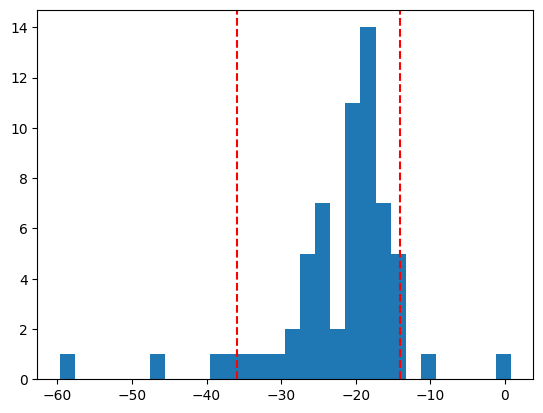

In [26]:
plt.hist(alpha_beta_df["Alpha"], bins=30)
plt.axvline(alpha_lower_cutoff, color='red', linestyle='dashed')
plt.axvline(alpha_upper_cutoff, color='red', linestyle='dashed')
plt.show()

In [27]:
# Create a DataFrame with the provided data
data = {
    'Core ID': ['MD96-2045', 'MD96-2067a', 'BARP9437', 'MD90-0955', 'BARP9411', 'BARP9430', 'MD96-2056', 'BARP9426', 'MD79-257', 'MD90-0961', 'MD77-205', 'MD90-0960', 'MD76-133', 'MD96-2065', 'MD76-011', 'BARP9409', 'MD96-2060', 'MD77-160', 'MD90-0963', 'BARP9412', 'MD90-0956', 'MD77-182', 'MD77-184', 'MD04-2873', 'MD96-2061', 'MD96-2066', 'MD96-2067b', 'MD90-0957', 'BARP9441', 'MD90-0939', 'MD96-2054', 'MD90-0938', 'MD90-0958', 'MD90-0940', 'MD90-0936', 'BARP9442', 'MD04-2875B', 'BARP9439', 'MD77-171', 'MD90-0949', 'MD76-132', 'MD04-2877', 'BARP9422', 'MD96-2055', 'MD79-260', 'MD12-3423', 'MD98-2165', 'MD77-202', 'MD77-204', 'MD90-0959', 'MD96-2064', 'MD96-2059', 'MD79-276', 'MD79-261', 'MD96-2049', 'MD77-185', 'MD96-2063', 'MD96-2044', 'MD96-2058', 'MD96-2051', 'MD96-2053', 'MD96-2067b2'],
    'Alpha': [-18.157425, -14.959702, -24.475254, -27.051262, -24.490918, -15.534841, -18.108650, -28.689328, -26.540595, -18.399807, -18.139061, -24.362528, 0.811169, -18.432012, -22.402200, -31.693948, -17.407659, -19.512952, -13.982205, -29.763404, -18.204009, -19.094018, -19.723482, -25.450741, -18.671537, -19.398866, -20.347793, -21.791071, -24.282491, -16.318197, -20.826218, -16.053934, -27.746896, -17.119990, -18.971236, -20.810424, -36.085941, -33.622183, -59.675240, -16.309463, -18.385484, -26.162899, -21.007201, -20.660047, -19.116017, -14.095055, -47.543768, -38.038229, -20.928647, -19.058695, -24.800059, -16.432166, -20.244363, -17.618696, -16.706299, -14.018848, -20.119371, -24.781504, -10.510314, -26.840740, -15.038397, -23.997345],
    'Beta': [0.073684, 0.059892, 0.107584, 0.117351, 0.108145, 1.267019, 0.076074, 0.115217, 0.117153, 0.077758, 0.072321, 0.100605, 0.091174, 0.076484, 0.086099, 0.126400, 0.074607, 0.071081, 0.057057, 0.127875, 0.072886, 0.077525, 0.077071, 0.110839, 0.083844, 0.086847, 0.087612, 0.087879, 0.098146, 0.059510, 0.087003, 0.062156, 0.117290, 0.060660, 0.076349, 0.085831, 0.164885, 0.142281, 2.526911, 0.064448, 0.076194, 0.113199, 0.079556, 1.639543, 0.070689, 0.060115, 0.200487, 0.163262, 0.085537, 0.071948, 0.116314, 0.072410, 0.079420, 0.073516, 0.073214, 0.057912, 0.093577, 0.102145, 0.039074, 0.113985, 0.057754, 0.096122]
}

df = pd.DataFrame(data)

# Classify the cores based on Alpha and Beta values
def classify_core(alpha, beta):
    # Category 1: Exponential Cutoff Dominant
    # Cases with very high Beta values showing extreme dissolution thresholds
    if beta >= 1.0:
        return "Exponential Cutoff Dominant (Extreme Dissolution Threshold)"
    
    # Category 2: Strong Power Law with Dissolution
    # Combines steep power law decline (very negative Alpha) with significant Beta
    elif alpha < -30 and beta >= 0.1:
        return "Strong Power Law with Dissolution (High Dissolution)"
    
    # Category 3: Moderate Power Law with Dissolution
    # Moderate Alpha and Beta values representing intermediate dissolution effects
    elif -30 <= alpha < -15 and beta >= 0.05:
        return "Moderate Power Law with Dissolution (Intermediate Dissolution)"
    
    # Category 4: Weak/Anomalous Dissolution Patterns
    # Either minimal dissolution (small negative Alpha) or unusual patterns
    else:
        return "Weak/Anomalous Dissolution Pattern"


df['Classification'] = df.apply(lambda row: classify_core(row['Alpha'], row['Beta']), axis=1)

# Display the classified DataFrame
df

Core ID      Alpha      Beta  \
0     MD96-2045 -18.157425  0.073684   
1    MD96-2067a -14.959702  0.059892   
2      BARP9437 -24.475254  0.107584   
3     MD90-0955 -27.051262  0.117351   
4      BARP9411 -24.490918  0.108145   
5      BARP9430 -15.534841  1.267019   
6     MD96-2056 -18.108650  0.076074   
7      BARP9426 -28.689328  0.115217   
8      MD79-257 -26.540595  0.117153   
9     MD90-0961 -18.399807  0.077758   
10     MD77-205 -18.139061  0.072321   
11    MD90-0960 -24.362528  0.100605   
12     MD76-133   0.811169  0.091174   
13    MD96-2065 -18.432012  0.076484   
14     MD76-011 -22.402200  0.086099   
15     BARP9409 -31.693948  0.126400   
16    MD96-2060 -17.407659  0.074607   
17     MD77-160 -19.512952  0.071081   
18    MD90-0963 -13.982205  0.057057   
19     BARP9412 -29.763404  0.127875   
20    MD90-0956 -18.204009  0.072886   
21     MD77-182 -19.094018  0.077525   
22     MD77-184 -19.723482  0.077071   
23    MD04-2873 -25.450741  0.110839   
24    MD96-2061 -18.671537  0.083844   
25    MD96-2066 -19.398866  0.086847   
26   MD96-2067b -20.347793  0.087612   
27    MD90-0957 -21.791071  0.087879   
28     BARP9441 -24.282491  0.098146   
29    MD90-0939 -16.318197  0.059510   
30    MD96-2054 -20.826218  0.087003   
31    MD90-0938 -16.053934  0.062156   
32    MD90-0958 -27.746896  0.117290   
33    MD90-0940 -17.119990  0.060660   
34    MD90-0936 -18.971236  0.076349   
35     BARP9442 -20.810424  0.085831   
36   MD04-2875B -36.085941  0.164885   
37     BARP9439 -33.622183  0.142281   
38     MD77-171 -59.675240  2.526911   
39    MD90-0949 -16.309463  0.064448   
40     MD76-132 -18.385484  0.076194   
41    MD04-2877 -26.162899  0.113199   
42     BARP9422 -21.007201  0.079556   
43    MD96-2055 -20.660047  1.639543   
44     MD79-260 -19.116017  0.070689   
45    MD12-3423 -14.095055  0.060115   
46    MD98-2165 -47.543768  0.200487   
47     MD77-202 -38.038229  0.163262   
48     MD77-204 -20.928647  0.085537   
49    MD90-0959 -19.058695  0.071948   
50    MD96-2064 -24.800059  0.116314   
51    MD96-2059 -16.432166  0.072410   
52     MD79-276 -20.244363  0.079420   
53     MD79-261 -17.618696  0.073516   
54    MD96-2049 -16.706299  0.073214   
55     MD77-185 -14.018848  0.057912   
56    MD96-2063 -20.119371  0.093577   
57    MD96-2044 -24.781504  0.102145   
58    MD96-2058 -10.510314  0.039074   
59    MD96-2051 -26.840740  0.113985   
60    MD96-2053 -15.038397  0.057754   
61  MD96-2067b2 -23.997345  0.096122   

                                       Classification  
0   Moderate Power Law with Dissolution (Intermedi...  
1                  Weak/Anomalous Dissolution Pattern  
2   Moderate Power Law with Dissolution (Intermedi...  
3   Moderate Power Law with Dissolution (Intermedi...  
4   Moderate Power Law with Dissolution (Intermedi...  
5   Exponential Cutoff Dominant (Extreme Dissoluti...  
6   Moderate Power Law with Dissolution (Intermedi...  
7   Moderate Power Law with Dissolution (Intermedi...  
8   Moderate Power Law with Dissolution (Intermedi...  
9   Moderate Power Law with Dissolution (Intermedi...  
10  Moderate Power Law with Dissolution (Intermedi...  
11  Moderate Power Law with Dissolution (Intermedi...  
12                 Weak/Anomalous Dissolution Pattern  
13  Moderate Power Law with Dissolution (Intermedi...  
14  Moderate Power Law with Dissolution (Intermedi...  
15  Strong Power Law with Dissolution (High Dissol...  
16  Moderate Power Law with Dissolution (Intermedi...  
17  Moderate Power Law with Dissolution (Intermedi...  
18                 Weak/Anomalous Dissolution Pattern  
19  Moderate Power Law with Dissolution (Intermedi...  
20  Moderate Power Law with Dissolution (Intermedi...  
21  Moderate Power Law with Dissolution (Intermedi...  
22  Moderate Power Law with Dissolution (Intermedi...  
23  Moderate Power Law with Dissolution (Intermedi...  
24  Moderate Power Law with Dissolution (Intermedi...  
25  Moderate Power Law with Dis

In [28]:
df['Classification'].value_counts()

Classification
Moderate Power Law with Dissolution (Intermediate Dissolution)    48
Weak/Anomalous Dissolution Pattern                                 6
Strong Power Law with Dissolution (High Dissolution)               5
Exponential Cutoff Dominant (Extreme Dissolution Threshold)        3
Name: count, dtype: int64

## Run Vif (multicollinearity test)

### Forams

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

def calculate_vif(df, features):
    """Calculates VIF for specified features in a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the features.
        features (list): List of feature names for VIF calculation.

    Returns:
        pd.DataFrame: VIF results for each feature.
    """

    X = df[features]  # Select features for VIF
    X = X.dropna()  # Drop rows with missing values


    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create a DataFrame with the standardized data
    X_scaled_df = pd.DataFrame(X_scaled, columns=features)

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_scaled_df.columns
    vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

    return vif_data

In [30]:
def create_vif_data():
    all_features = []  # List to store features for each sample

    for sample in foram_df_no_outliers['core_id'].unique():
        # Forams metrics
        foram_data = foram_no_outlier_grouped.get_group(sample)
        variance_forams = np.var(foram_data['Diameter'], ddof=1)  # Sample variance
        diameter_forams = foram_data['Diameter'].mean()
        circularity_forams = foram_data['Circularity'].mean()
        solidity_forams = foram_data['Solidity '].mean()
        eccentricity_forams = foram_data['Eccentricity'].mean()
        area_forams = foram_data['Areamm2'].mean()
        perimeter_forams = foram_data['Perimeterm2'].mean()
        roundness_forams = foram_data['Roundnessm'].mean()
        kurtosis_forams = foram_data['Kurtosis'].mean()

        # Append the feature list for the current sample
        all_features.append([variance_forams,  circularity_forams, 
                             
                             roundness_forams,   kurtosis_forams
        ])
    # diameter_forams, area_forams, eccentricity_forams,solidity_forams, perimeter_forams,
    # Create DataFrame after collecting all features
    vif_data = pd.DataFrame(all_features, columns=['variance_forams', 'circularity_forams',                            
                            'roundness_forams', 'kurtosis_forams'
    ])

    return vif_data

In [31]:
df_foram_X = create_vif_data()
feature_foram = ['variance_forams', 'circularity_forams', 
            
            'roundness_forams',  'kurtosis_forams'
        ]

calculate_vif(df_foram_X, feature_foram)

Feature       VIF
0     variance_forams  1.505644
1  circularity_forams  1.974038
2    roundness_forams  1.899481
3     kurtosis_forams  1.904695

## Fragments

In [32]:
def create_frag_vif_data():
    all_features = []  # List to store features for each sample

    for sample in frag_df_no_outliers['core_id'].unique():
        # Forams metrics
        fragment_data = frag_no_outlier_grouped.get_group(sample)
        variance_frag = np.var(fragment_data['Diameter'], ddof=1)  # Sample variance
        diameter_frag = fragment_data['Diameter'].mean()
        circularity_frag = fragment_data['Circularity'].mean()
        solidity_frag = fragment_data['Solidity '].mean()
        eccentricity_frag = fragment_data['Eccentricity'].mean()
        area_frag = fragment_data['Areamm2'].mean()
        perimeter_frag = fragment_data['Perimeterm2'].mean()
        roundness_frag = fragment_data['Roundnessm'].mean()
        kurtosis_frag = fragment_data['Kurtosis'].mean()

        # Append the feature list for the current sample
        all_features.append([variance_frag, diameter_frag, circularity_frag,
              eccentricity_frag, kurtosis_frag,
              
        ])
    # area_frag, perimeter_frag, roundness_frag, solidity_frag, 
    # Create DataFrame after collecting all features
    frag_vif_data = pd.DataFrame(all_features, columns=[
    'variance_frag', 'diameter_frag', 'circularity_frag',
              'eccentricity_frag', 'kurtosis_frag',              
            
    ])

    return frag_vif_data

In [33]:
df_frag_X = create_frag_vif_data()
feature_frag = ['variance_frag', 'diameter_frag', 'circularity_frag',
              'eccentricity_frag', 'kurtosis_frag', 
               ]

calculate_vif(df_frag_X, feature_frag)

Feature       VIF
0      variance_frag  3.384251
1      diameter_frag  3.897335
2   circularity_frag  2.809004
3  eccentricity_frag  4.162603
4      kurtosis_frag  1.584891

## Forams + Fragments

In [34]:
def create_full_vif_data():
    all_features = []  # List to store features for each core/sample

    # Get the common core IDs present in both datasets
    common_core_ids = set(df_foram['core_id'].unique()) & set(df_fragment['core_id'].unique())

    for core_id in common_core_ids:
        # Forams metrics
        foram_data = foram_no_outlier_grouped.get_group(core_id)
        variance_forams = np.var(foram_data['Diameter'], ddof=1)  # Sample variance
        diameter_forams = foram_data['Diameter'].mean()
        circularity_forams = foram_data['Circularity'].mean()
        solidity_forams = foram_data['Solidity '].mean()  # Removed extra space
        eccentricity_forams = foram_data['Eccentricity'].mean()
        area_forams = foram_data['Areamm2'].mean()
        perimeter_forams = foram_data['Perimeterm2'].mean()
        roundness_forams = foram_data['Roundnessm'].mean()
        kurtosis_forams = foram_data['Kurtosis'].mean()
        
        # Fragments metrics
        fragment_data = frag_no_outlier_grouped.get_group(core_id)
        variance_frag = np.var(fragment_data['Diameter'], ddof=1)
        diameter_frag = fragment_data['Diameter'].mean()
        circularity_frag = fragment_data['Circularity'].mean()
        solidity_frag = fragment_data['Solidity '].mean()
        eccentricity_frag = fragment_data['Eccentricity'].mean()
        area_frag = fragment_data['Areamm2'].mean()
        perimeter_frag = fragment_data['Perimeterm2'].mean()
        roundness_frag = fragment_data['Roundnessm'].mean()
        kurtosis_frag = fragment_data['Kurtosis'].mean()

        # Append combined features
        all_features.append([
            variance_forams, circularity_forams, eccentricity_forams,
             kurtosis_forams,
            variance_frag, circularity_frag, eccentricity_frag,
             kurtosis_frag
        ])

    # Create DataFrame after collecting all features
    full_vif_data = pd.DataFrame(all_features, columns=[
        'variance_forams', 'circularity_forams',
        'eccentricity_forams',  'kurtosis_forams',
        'variance_frag', 'circularity_frag', 
        'eccentricity_frag', 'kurtosis_frag'
    ])
    
    return full_vif_data


In [35]:
df_full_X = create_full_vif_data()
feature = ['variance_forams', 'circularity_forams', 
        'eccentricity_forams',  'kurtosis_forams',
        'variance_frag',  'circularity_frag', 
        'eccentricity_frag', 'kurtosis_frag']

calculate_vif(df_full_X, feature)

Feature       VIF
0      variance_forams  2.703949
1   circularity_forams  3.891705
2  eccentricity_forams  2.164676
3      kurtosis_forams  2.819703
4        variance_frag  1.995146
5     circularity_frag  3.519950
6    eccentricity_frag  3.427960
7        kurtosis_frag  4.395134

## Dissolution Indices Re-calculated 

In [36]:
# Create a global rank
species_order = [
    'Globigerinoides ruber', 'Globoturborotalita rubescens', 'Globoturborotalita tenella',
    'Globigerinella siphonifera', 'Globigerinoides sacculifer', 'Globigerinoides conglobatus',
    'Globigerina bulloides', 'Globigerinita glutinata', 'Globigerina falconensis',
    'Orbulina universa', 'Globorotalia scitula', 'Globoquadrina conglomerata', 
    'Globorotalia hirsuta', 'Globorotalia truncatulinoides', 'Globorotalia inflata', 
    'Globorotalia menardii', 'Globorotalia crassaformis', 'Neogloboquadrina dutertrei', 
    'Neogloboquadrina incompta', 'Pulleniatina obliquiloculata', 'Globorotalia tumida', 'Turborotalita humilis',
]

susceptible_species = [
    'Globigerinoides ruber', 'Globoturborotalita rubescens', 'Globoturborotalita tenella',
    'Globigerinella siphonifera', 'Globigerinoides sacculifer', 'Globigerinoides conglobatus',
    'Globigerina bulloides', 'Globigerinita glutinata', 'Globigerina falconensis',
    'Orbulina universa', 'Globorotalia scitula',
]

resistant_species = [
    'Globoquadrina conglomerata', 'Globorotalia hirsuta', 'Globorotalia truncatulinoides', 
    'Globorotalia inflata', 'Globorotalia menardii', 'Globorotalia crassaformis', 
    'Neogloboquadrina dutertrei', 'Neogloboquadrina incompta', 'Pulleniatina obliquiloculata', 
    'Globorotalia tumida', 'Turborotalita humilis',
]

global_rank = {species: rank + 1 for rank, species in enumerate(species_order)}

def clean_species_name(name):
    """
    Cleans the species name to match the format in the global rank.
    
    Args:
        name (str): The species name to clean.
    
    Returns:
        str: The cleaned species name.
    """
    return ' '.join(name.split()).replace('_', ' ')

def calculate_dissolution_indices():  
    """
    Calculates various dissolution indices for common core IDs in the datasets.

    Returns:
        pd.DataFrame: A DataFrame containing the dissolution indices for each core ID.
    """
    indices = {
        'Core ID': [],
        'FV-Index_0': [],
        'FV-Index_1': [],
        'FV-Index_2': [],
        'FV-Index_3': [],
        'FV-Index_4': [],
        'FV-Index_5': [],
        'FV-Index_6': [],
        'FV-Index_7': [],
        'FV-Index_8': [],
        'Frag_Intensity': [],
        'Frag_Rate': [],
        'BP Index': [],
        'SRR_Index': []
    }

    common_core_ids = set(foram_df_no_outliers['core_id'].unique()) & set(frag_df_no_outliers['core_id'].unique())
    alpha, beta = 0.7, 0.3
    median_rank = np.median(list(global_rank.values()))

    for core_id in common_core_ids:
        foram_data = foram_no_outlier_grouped.get_group(core_id)
        fragment_data = frag_no_outlier_grouped.get_group(core_id)

        # Clean species names
        foram_data['Species'] = foram_data['Species'].apply(clean_species_name)

        count_forams = foram_data.shape[0]
        count_frag = fragment_data.shape[0]

        variance_forams = np.var(foram_data['Diameter'], ddof=1)
        circularity_forams = foram_data['Circularity'].mean()
        eccentricity_forams = foram_data['Eccentricity'].mean()
        kurtosis_forams = foram_data['Kurtosis'].mean()

        variance_frag = np.var(fragment_data['Diameter'], ddof=1)
        circularity_frag = fragment_data['Circularity'].mean()
        eccentricity_frag = fragment_data['Eccentricity'].mean()
        area_frag = np.sqrt(fragment_data['Areamm2']).mean()
        perimeter_frag = fragment_data['Perimeterm2'].mean()

        # Count susceptible and resistant species
        susceptible_count = foram_data[foram_data['Species'].isin(susceptible_species)].shape[0]
        resistant_count = foram_data[foram_data['Species'].isin(resistant_species)].shape[0]
        
        # Compute SRR index (avoid division by zero)
        srr_index = (susceptible_count / resistant_count) if resistant_count > 0 else np.nan

        if variance_forams > 0 and circularity_forams > 0:
            indices['Core ID'].append(core_id)
            indices['FV-Index_0'].append(variance_frag / variance_forams)
            indices['FV-Index_1'].append((variance_frag / variance_forams) * ((1 - eccentricity_frag) / circularity_forams) * (eccentricity_forams / kurtosis_forams))
            indices['FV-Index_2'].append(((variance_frag * (1 - eccentricity_frag)) / (variance_forams * (area_frag / perimeter_frag))) * kurtosis_forams)
            indices['FV-Index_3'].append((variance_frag / variance_forams) * (1 - eccentricity_frag))
            indices['FV-Index_4'].append((variance_frag / variance_forams) * (area_frag / perimeter_frag))
            indices['FV-Index_5'].append((alpha * (variance_frag / variance_forams)) + (beta * (1 - eccentricity_frag)))
            indices['FV-Index_6'].append((variance_frag * (1 - eccentricity_frag)) / (variance_forams * circularity_forams))
            indices['FV-Index_7'].append((variance_frag * (1 - eccentricity_frag)) / (variance_forams * kurtosis_forams))
            indices['FV-Index_8'].append(((variance_frag * 0.7) + (circularity_frag * 0.3)) / ((variance_forams * 0.6) + (kurtosis_forams * 0.4)))
            indices['Frag_Intensity'].append((count_frag / (count_frag + count_forams)) / (area_frag / perimeter_frag))
            indices['Frag_Rate'].append(((count_frag/8) / ((count_frag/8) + count_forams)) * 100)
            indices['SRR_Index'].append(srr_index)

            # Calculate BP index
            species_ranks = foram_data['Species'].map(global_rank)
            average_rank = species_ranks.mean()
            bp_index = average_rank / median_rank
            indices['BP Index'].append(bp_index)
        else:
            indices['Core ID'].append(core_id)
            for key in indices:
                if key != 'Core ID':
                    indices[key].append(np.nan)

    all_dissolution_indices = pd.DataFrame(indices)
    
    return all_dissolution_indices

In [37]:
dissolution_indices_calculated = calculate_dissolution_indices()

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_34421/534389403.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foram_data['Species'] = foram_data['Species'].apply(clean_species_name)
/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_34421/534389403.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foram_data['Species'] = foram_data['Species'].apply(clean_species_name)
/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_34421/534389403.py:73: SettingWithCopyWarning: 
A val

In [38]:
import numpy as np
import pandas as pd

# ---------------------------
# Global Definitions
# ---------------------------
species_order = [
    'Globigerinoides ruber', 'Globoturborotalita rubescens', 'Globoturborotalita tenella',
    'Globigerinella siphonifera', 'Globigerinoides sacculifer', 'Globigerinoides conglobatus',
    'Globigerina bulloides', 'Globigerinita glutinata', 'Globigerina falconensis',
    'Orbulina universa', 'Globorotalia scitula', 'Globoquadrina conglomerata', 
    'Globorotalia hirsuta', 'Globorotalia truncatulinoides', 'Globorotalia inflata', 
    'Globorotalia menardii', 'Globorotalia crassaformis', 'Neogloboquadrina dutertrei', 
    'Neogloboquadrina incompta', 'Pulleniatina obliquiloculata', 'Globorotalia tumida', 'Turborotalita humilis',
]

susceptible_species = [
    'Globigerinoides ruber', 'Globoturborotalita rubescens', 'Globoturborotalita tenella',
    'Globigerinella siphonifera', 'Globigerinoides sacculifer', 'Globigerinoides conglobatus',
    'Globigerina bulloides', 'Globigerinita glutinata', 'Globigerina falconensis',
    'Orbulina universa', 'Globorotalia scitula',
]

resistant_species = [
    'Globoquadrina conglomerata', 'Globorotalia hirsuta', 'Globorotalia truncatulinoides', 
    'Globorotalia inflata', 'Globorotalia menardii', 'Globorotalia crassaformis', 
    'Neogloboquadrina dutertrei', 'Neogloboquadrina incompta', 'Pulleniatina obliquiloculata', 
    'Globorotalia tumida', 'Turborotalita humilis',
]

# Create global rank dictionary and parameters
global_rank = {species: rank + 1 for rank, species in enumerate(species_order)}
median_rank = np.median(list(global_rank.values()))
alpha, beta = 0.7, 0.3

def clean_species_name(name):
    """
    Cleans the species name to match the format in the global rank.
    """
    return ' '.join(name.split()).replace('_', ' ')

# ---------------------------
# Function to Compute Point Estimates of Indices
# ---------------------------
def compute_indices(foram_data, fragment_data):
    """
    Computes the dissolution indices for a given core based on its foram and fragment data.
    Returns a dictionary with the indices.
    """
    # Count observations
    count_forams = foram_data.shape[0]
    count_frag = fragment_data.shape[0]
    
    # Forams summary statistics
    variance_forams = np.var(foram_data['Diameter'], ddof=1)
    circularity_forams = foram_data['Circularity'].mean()
    eccentricity_forams = foram_data['Eccentricity'].mean()
    kurtosis_forams = foram_data['Kurtosis'].mean()
    
    # Fragments summary statistics
    variance_frag = np.var(fragment_data['Diameter'], ddof=1)
    circularity_frag = fragment_data['Circularity'].mean()
    eccentricity_frag = fragment_data['Eccentricity'].mean()
    area_frag = np.sqrt(fragment_data['Areamm2']).mean()
    perimeter_frag = fragment_data['Perimeterm2'].mean()
    
    # Compute SRR index (avoid division by zero)
    susceptible_count = foram_data[foram_data['Species'].isin(susceptible_species)].shape[0]
    resistant_count = foram_data[foram_data['Species'].isin(resistant_species)].shape[0]
    srr_index = (susceptible_count / resistant_count) if resistant_count > 0 else np.nan
    
    # If key denominators are non-positive, return NaN for all indices
    if variance_forams <= 0 or circularity_forams <= 0:
        return {key: np.nan for key in ['FV-Index_0', 'FV-Index_1', 'FV-Index_2', 'FV-Index_3',
                                         'FV-Index_4', 'FV-Index_5', 'FV-Index_6', 'FV-Index_7',
                                         'FV-Index_8', 'Frag_Intensity', 'Frag_Rate', 'BP Index', 'SRR_Index']}
    
    # Compute dissolution indices
    fv_index_0 = variance_frag / variance_forams
    fv_index_1 = (variance_frag / variance_forams) * ((1 - eccentricity_frag) / circularity_forams) * (eccentricity_forams / kurtosis_forams)
    fv_index_2 = ((variance_frag * (1 - eccentricity_frag)) / (variance_forams * (area_frag / perimeter_frag))) * kurtosis_forams
    fv_index_3 = (variance_frag / variance_forams) * (1 - eccentricity_frag)
    fv_index_4 = (variance_frag / variance_forams) * (area_frag / perimeter_frag)
    fv_index_5 = (alpha * (variance_frag / variance_forams)) + (beta * (1 - eccentricity_frag))
    fv_index_6 = (variance_frag * (1 - eccentricity_frag)) / (variance_forams * circularity_forams)
    fv_index_7 = (variance_frag * (1 - eccentricity_frag)) / (variance_forams * kurtosis_forams)
    fv_index_8 = ((variance_frag * 0.7) + (circularity_frag * 0.3)) / ((variance_forams * 0.6) + (kurtosis_forams * 0.4))
    frag_intensity = (count_frag / (count_frag + count_forams)) / (area_frag / perimeter_frag)
    frag_rate = ((count_frag / 8) / ((count_frag / 8) + count_forams)) * 100
    species_ranks = foram_data['Species'].map(global_rank)
    bp_index = species_ranks.mean() / median_rank
    
    return {
        'FV-Index_0': fv_index_0,
        'FV-Index_1': fv_index_1,
        'FV-Index_2': fv_index_2,
        'FV-Index_3': fv_index_3,
        'FV-Index_4': fv_index_4,
        'FV-Index_5': fv_index_5,
        'FV-Index_6': fv_index_6,
        'FV-Index_7': fv_index_7,
        'FV-Index_8': fv_index_8,
        'Frag_Intensity': frag_intensity,
        'Frag_Rate': frag_rate,
        'BP Index': bp_index,
        'SRR_Index': srr_index
    }

# ---------------------------
# Bootstrap Function for Standard Errors
# ---------------------------
def bootstrap_indices(foram_data, fragment_data, n_iter=1000):
    """
    Uses bootstrap resampling to compute the standard error for each dissolution index.
    Returns a dictionary with keys of the form '<index>_SE'.
    """
    # Prepare lists to hold bootstrap replicates for each index
    bootstrap_results = {key: [] for key in ['FV-Index_0', 'FV-Index_1', 'FV-Index_2', 'FV-Index_3',
                                              'FV-Index_4', 'FV-Index_5', 'FV-Index_6', 'FV-Index_7',
                                              'FV-Index_8', 'Frag_Intensity', 'Frag_Rate', 'BP Index', 'SRR_Index']}
    n_forams = foram_data.shape[0]
    n_frag = fragment_data.shape[0]
    
    # If sample sizes are too small, return NaN errors
    if n_forams < 2 or n_frag < 2:
        return {f'{key}_SE': np.nan for key in bootstrap_results}
    
    # Perform bootstrap iterations
    for _ in range(n_iter):
        # Resample foram and fragment data with replacement
        foram_sample = foram_data.sample(n=n_forams, replace=True)
        frag_sample = fragment_data.sample(n=n_frag, replace=True)
        # Compute indices for the bootstrap sample
        boot_indices = compute_indices(foram_sample, frag_sample)
        for key in bootstrap_results:
            bootstrap_results[key].append(boot_indices[key])
    
    # Compute the standard error (sample standard deviation) for each index
    se = {f'{key}_SE': np.nan if np.all(np.isnan(bootstrap_results[key])) 
          else np.std(bootstrap_results[key], ddof=1)
          for key in bootstrap_results}
    return se

# ---------------------------
# Main Function to Calculate Indices and Errors
# ---------------------------
def calculate_dissolution_indices():
    """
    Calculates dissolution indices and their bootstrap-based standard errors
    for all common core IDs.
    
    Returns:
        indices_df (pd.DataFrame): DataFrame with one row per core and columns for each index.
        errors_df (pd.DataFrame): DataFrame with one row per core and columns for the standard errors.
    """
    # Dictionaries to hold point estimates and errors
    results_idx = {
        'Core ID': [],
        'FV-Index_0': [], 'FV-Index_1': [], 'FV-Index_2': [], 'FV-Index_3': [],
        'FV-Index_4': [], 'FV-Index_5': [], 'FV-Index_6': [], 'FV-Index_7': [],
        'FV-Index_8': [], 'Frag_Intensity': [], 'Frag_Rate': [],
        'BP Index': [], 'SRR_Index': []
    }
    results_err = {
        'Core ID': [],
        'FV-Index_0_SE': [], 'FV-Index_1_SE': [], 'FV-Index_2_SE': [], 'FV-Index_3_SE': [],
        'FV-Index_4_SE': [], 'FV-Index_5_SE': [], 'FV-Index_6_SE': [], 'FV-Index_7_SE': [],
        'FV-Index_8_SE': [], 'Frag_Intensity_SE': [], 'Frag_Rate_SE': [],
        'BP Index_SE': [], 'SRR_Index_SE': []
    }
    
    # Identify common core IDs between the foram and fragment datasets
    common_core_ids = set(foram_df_no_outliers['core_id'].unique()) & set(frag_df_no_outliers['core_id'].unique())
    
    for core_id in common_core_ids:
        # Retrieve the data for this core
        foram_data = foram_no_outlier_grouped.get_group(core_id).copy()
        fragment_data = frag_no_outlier_grouped.get_group(core_id).copy()
        
        # Clean species names in the foram data
        foram_data['Species'] = foram_data['Species'].apply(clean_species_name)
        
        # Compute point estimates of the indices
        point_indices = compute_indices(foram_data, fragment_data)
        # Compute bootstrap-based standard errors
        errors = bootstrap_indices(foram_data, fragment_data, n_iter=1000)
        
        # Append core ID to both dictionaries
        results_idx['Core ID'].append(core_id)
        results_err['Core ID'].append(core_id)
        # Append each index and its error
        for key in ['FV-Index_0', 'FV-Index_1', 'FV-Index_2', 'FV-Index_3', 'FV-Index_4',
                    'FV-Index_5', 'FV-Index_6', 'FV-Index_7', 'FV-Index_8', 'Frag_Intensity',
                    'Frag_Rate', 'BP Index', 'SRR_Index']:
            results_idx[key].append(point_indices[key])
            results_err[f'{key}_SE'].append(errors.get(f'{key}_SE', np.nan))
    
    indices_df = pd.DataFrame(results_idx)
    errors_df = pd.DataFrame(results_err)
    return indices_df, errors_df

# ---------------------------
# Example Usage
# ---------------------------
# Make sure that the following objects are defined:
# - foram_df_no_outliers, frag_df_no_outliers,
# - foram_no_outlier_grouped, frag_no_outlier_grouped
#
# Then run:

dissolution_indices_calculated, dissolution_errors_df = calculate_dissolution_indices()


In [39]:
dissolution_indices_calculated

Core ID  FV-Index_0  FV-Index_1  FV-Index_2  FV-Index_3  FV-Index_4  \
0     MD96-2064    0.690939    0.065568    5.133315    0.319180    0.160570   
1     MD90-0938    0.560889    0.054050    3.505860    0.237845    0.129381   
2      MD77-182    0.374752    0.030364    2.203218    0.130092    0.077495   
3     MD12-3423    0.457340    0.050126    2.977763    0.204389    0.103607   
4      BARP9439    0.787407    0.071033    4.762944    0.308942    0.174570   
5      MD79-260    0.935025    0.087843    5.051526    0.367026    0.212360   
6     MD96-2051    0.762626    0.071003    5.097707    0.324965    0.168816   
7     MD90-0963    0.874590    0.061598    6.103380    0.322727    0.193648   
8     MD98-2165    1.184903    0.086659    8.176514    0.453016    0.271203   
9     MD90-0956    0.860849    0.076371    4.950090    0.317887    0.189511   
10     BARP9426    0.522929    0.049812    3.361057    0.220326    0.121413   
11    MD96-2053    0.964793    0.096238    5.379022    0.374925    0.212577   
12     MD79-276    0.620179    0.056856    3.498391    0.261766    0.145236   
13   MD96-2067b    0.851850    0.059818    6.329901    0.333365    0.187060   
14     MD76-132    1.181155    0.107531    7.223386    0.459951    0.262991   
15     MD77-171    0.412680    0.028124    2.845011    0.151927    0.095003   
16   MD04-2875B    1.175722    0.108858    9.913973    0.555128    0.271786   
17    MD90-0957    1.064976    0.095237    6.157879    0.397270    0.232794   
18    MD96-2045    0.538110    0.061592    2.846236    0.227489    0.121800   
19   MD96-2067a    0.674085    0.057097    4.562705    0.277975    0.153209   
20    MD96-2056    0.751872    0.074332    4.926631    0.314135    0.167198   
21     MD77-160    0.548156    0.048891    3.254047    0.208314    0.122425   
22    MD90-0955    0.751277    0.062488    4.368172    0.275118    0.163380   
23    MD90-0949    0.600042    0.057711    3.751681    0.252000    0.137204   
24    MD96-2058    0.876038    0.079110    4.569956    0.311252    0.191389   
25    MD90-0959    0.546777    0.052401    3.044800    0.206078    0.119120   
26     BARP9409    0.487284    0.043458    3.100389    0.201371    0.111841   
27     BARP9411    0.724950    0.062317    4.569141    0.293415    0.167648   
28     MD76-011    0.681144    0.055956    4.383057    0.287244    0.152856   
29     MD77-185    0.969694    0.093638    5.782163    0.377966    0.215307   
30    MD96-2063    0.933070    0.087494    6.792893    0.417593    0.213514   
31    MD96-2054    0.943427    0.090677    6.113395    0.389084    0.210648   
32    MD96-2066    0.395940    0.033123    2.927314    0.169919    0.090196   
33    MD96-2065    0.479405    0.044213    3.204114    0.202028    0.108577   
34     MD77-205    1.125464    0.097045    6.952342    0.442827    0.252085   
35     MD77-184    0.378837    0.033224    2.403270    0.146753    0.083476   
36     MD79-261    0.878230    0.089889    4.805316    0.356300    0.199052   
37    MD96-2059    1.127482    0.106233    6.946134    0.453332    0.249726   
38     BARP9412    0.503758    0.039921    3.159285    0.194107    0.113157   
39     MD77-204    1.091870    0.093871    6.589116    0.412447    0.239410   
40    MD96-2060    1.759886    0.168569   10.906643    0.716693    0.394399   
41     MD77-202    1.283925    0.083069    7.893560    0.426065    0.271747   
42    MD90-0960    0.982107    0.085298    5.600612    0.368346    0.216723   
43    MD90-0939    0.679883    0.048640    4.172282    0.245864    0.152213   
44     MD76-133    1.554750    0.122721   10.303210    0.603150    0.354517   
45    MD90-0958    0.532144    0.043579    3.050454    0.190766    0.115159   
46    MD96-2044    0.630636    0.054822    3.645192    0.250658    0.145848   
47    MD04-2877    1.785132    0.144487   13.565624    0.751938    0.404228   
48     BARP9437    0.462963    0.040939    2.987779    0.193406    0.107046   
49    MD96-2055    1.469270    0.156197    9.348368    0.6

In [40]:
dissolution_errors_df.describe()

FV-Index_0_SE  FV-Index_1_SE  FV-Index_2_SE  FV-Index_3_SE  \
count      62.000000      62.000000      62.000000      62.000000   
mean        0.053753       0.004797       0.351533       0.021546   
std         0.031395       0.002723       0.204759       0.012035   
min         0.010301       0.000526       0.091441       0.003813   
25%         0.033863       0.002964       0.225199       0.014130   
50%         0.042569       0.004077       0.285783       0.017692   
75%         0.066107       0.005948       0.434787       0.025524   
max         0.197695       0.015261       1.252667       0.070984   

       FV-Index_4_SE  FV-Index_5_SE  FV-Index_6_SE  FV-Index_7_SE  \
count      62.000000      62.000000      62.000000      62.000000   
mean        0.011977       0.037638       0.029298       0.006072   
std         0.006889       0.021974       0.016368       0.003400   
min         0.002295       0.007246       0.004934       0.000746   
25%         0.007793       0.023698       0.019063       0.003884   
50%         0.009366       0.029826       0.024024       0.005111   
75%         0.014668       0.046322       0.034960       0.007442   
max         0.042674       0.138473       0.095650       0.018962   

       FV-Index_8_SE  Frag_Intensity_SE  Frag_Rate_SE  BP Index_SE  \
count      62.000000          62.000000  6.200000e+01    62.000000   
mean        0.062654           0.007869  2.164227e-15     0.014017   
std         0.036565           0.004279  2.738310e-15     0.006573   
min         0.012017           0.002631  0.000000e+00     0.005724   
25%         0.039471           0.004689  4.443114e-16     0.009019   
50%         0.049644           0.006750  1.332934e-15     0.011552   
75%         0.077087           0.010123  3.554491e-15     0.017776   
max         0.230253           0.022976  1.421797e-14     0.033396   

       SRR_Index_SE  
count     60.000000  
mean       2.541619  
std       16.444131  
min        0.020772  
25%        0.170096  
50%        0.280954  
75%        0.412469  
max      127.707508

In [41]:
# Load second dataset
df_manu = pd.read_csv("dissolution_manuscript_final.csv")

In [42]:
# Create a copy of the newly calcuated indices 
test_data_1 = dissolution_indices_calculated.copy()

In [43]:
pd.set_option('max_colwidth', None)

# Create a copy of the 'df_manu' dataframe
test_data_2 = df_manu.copy()

In [44]:
# Rename column names
test_data_2.rename(columns={
    'Depth (m)': 'Depth',
    'Ω Calcite (CO3 2-)': 'Omega_Calcite',
    'Frag_rate (%)' : 'Frag_Rate_prev',
    'Frag_Intensity' : 'Frag_Intensity_prev',
    'BP-Index' : 'BP-Index_prev',
    'Thermal Gradient ∆T (T0-200, °C)': 'Thermal_Gradient',
    'Temp_seasonality (Sum-win, °C)': 'Temp_Seasonality',
    'Sp_richness' : 'Sp_Richness',
    'Sp_diversity' : 'Sp_Diversity',
    'SST (°C)': 'SST',
    'Logpp': 'LogPP',
    'Sal (psu)': 'Salinity'
}, inplace=True)

In [45]:
# Convert core ids to object types
test_data_1['Core ID'] = test_data_1['Core ID'].astype('object')
test_data_2['Core ID'] = test_data_2['Core ID'].astype('object')

In [46]:
# Ensure column names are consistent
test_data_1.columns = test_data_1.columns.str.strip()
test_data_2.columns = test_data_2.columns.str.strip()

# Check if 'Core ID' exists in both DataFrames
if 'Core ID' in test_data_1.columns and 'Core ID' in test_data_2.columns:
    # Merge the two dataframes selecting only depth and omega calcite columns
    # from the second dataset
    merged_tests = test_data_1.merge(test_data_2[['Core ID', 'Depth', 'Omega_Calcite']], on='Core ID', how='left')
else:
    raise KeyError("The column 'Core ID' is not found in one or both DataFrames.")

In [47]:
# Ensure column names are consistent
test_data_1.columns = test_data_1.columns.str.strip()
test_data_2.columns = test_data_2.columns.str.strip()

# Check if 'Core ID' exists in both DataFrames
if 'Core ID' in test_data_1.columns and 'Core ID' in test_data_2.columns:
     # Merge the two dataframes (all columns included)
    merged_tests_all = test_data_1.merge(test_data_2, on='Core ID', how='left')
else:
    raise KeyError("The column 'Core ID' is not found in one or both DataFrames.")

### Correlation Matrix Heatmap (New calculations)

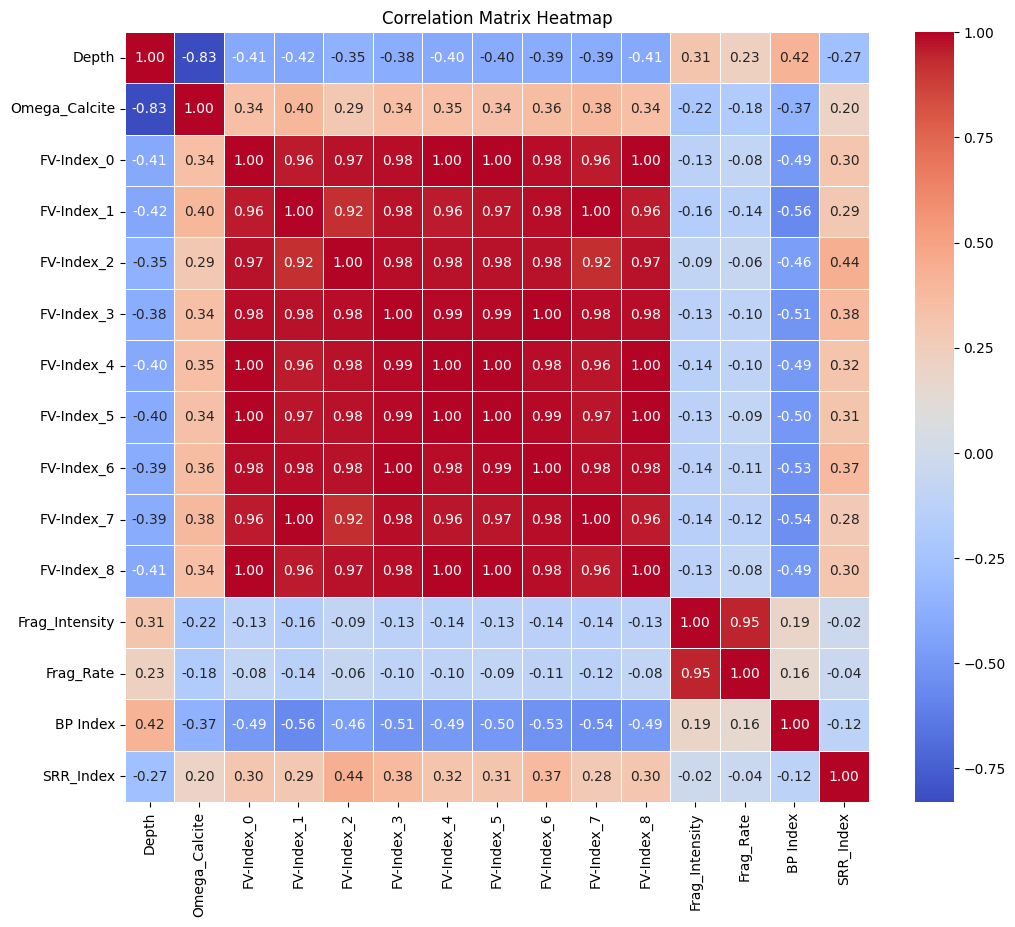

In [48]:
# Compute the correlation matrix
correlation_matrix = merged_tests[['Depth', 'Omega_Calcite', 'FV-Index_0', 'FV-Index_1', 
                                   'FV-Index_2', 'FV-Index_3', 'FV-Index_4', 'FV-Index_5', 
                                   'FV-Index_6', 'FV-Index_7', 'FV-Index_8', 'Frag_Intensity', 
                                   'Frag_Rate', 'BP Index', 'SRR_Index']].corr()

# Create a DataFrame for the correlation matrix
correlation_df = pd.DataFrame(correlation_matrix)

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Correlation Matrix Heatmap (Prev calculations)

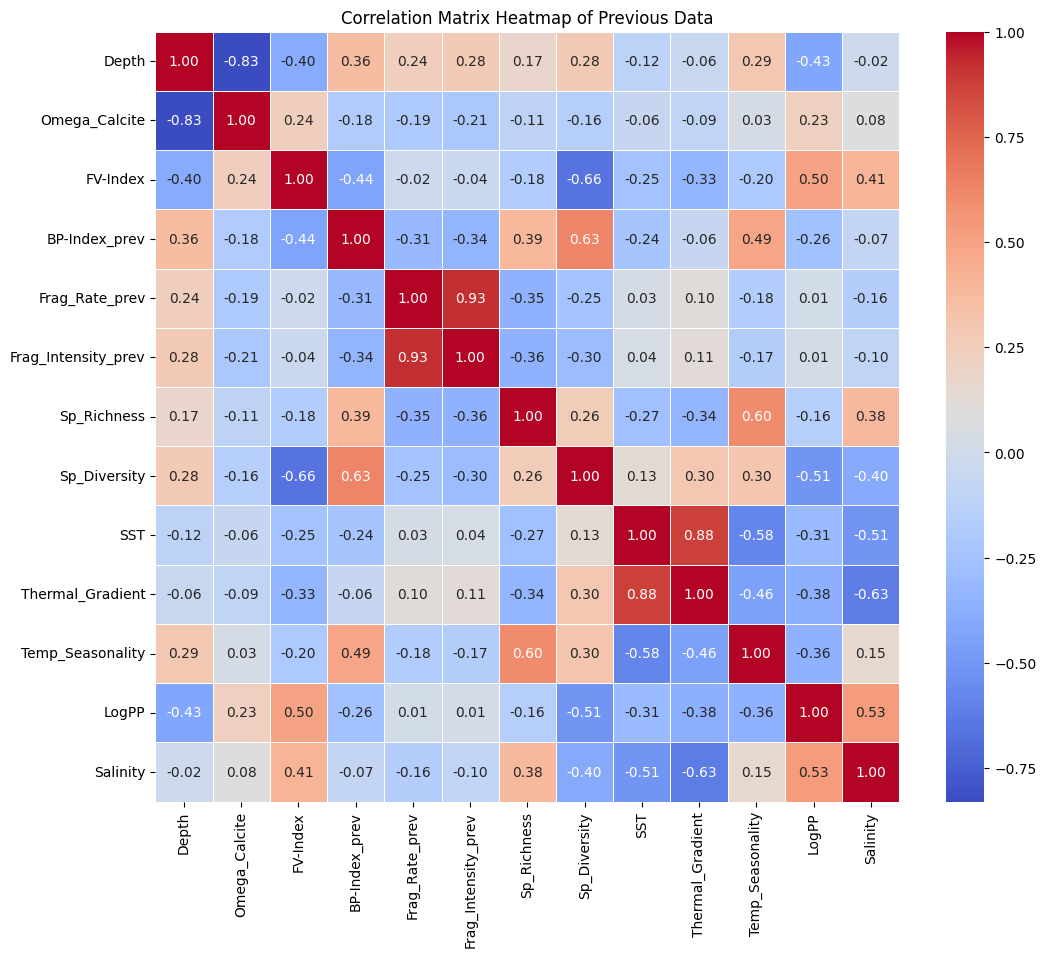

In [49]:
# Compute the correlation matrix
correlation_matrix_base = test_data_2[['Depth', 'Omega_Calcite', 'FV-Index', 'BP-Index_prev', 
       'Frag_Rate_prev', 'Frag_Intensity_prev',  'Sp_Richness',
       'Sp_Diversity', 'SST', 'Thermal_Gradient',
       'Temp_Seasonality', 'LogPP', 'Salinity']].corr()

# Create a DataFrame for the correlation matrix
correlation_df_base = pd.DataFrame(correlation_matrix_base)

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df_base, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Previous Data')
plt.show()

### Correlation Matrix Combined (New & Prev)

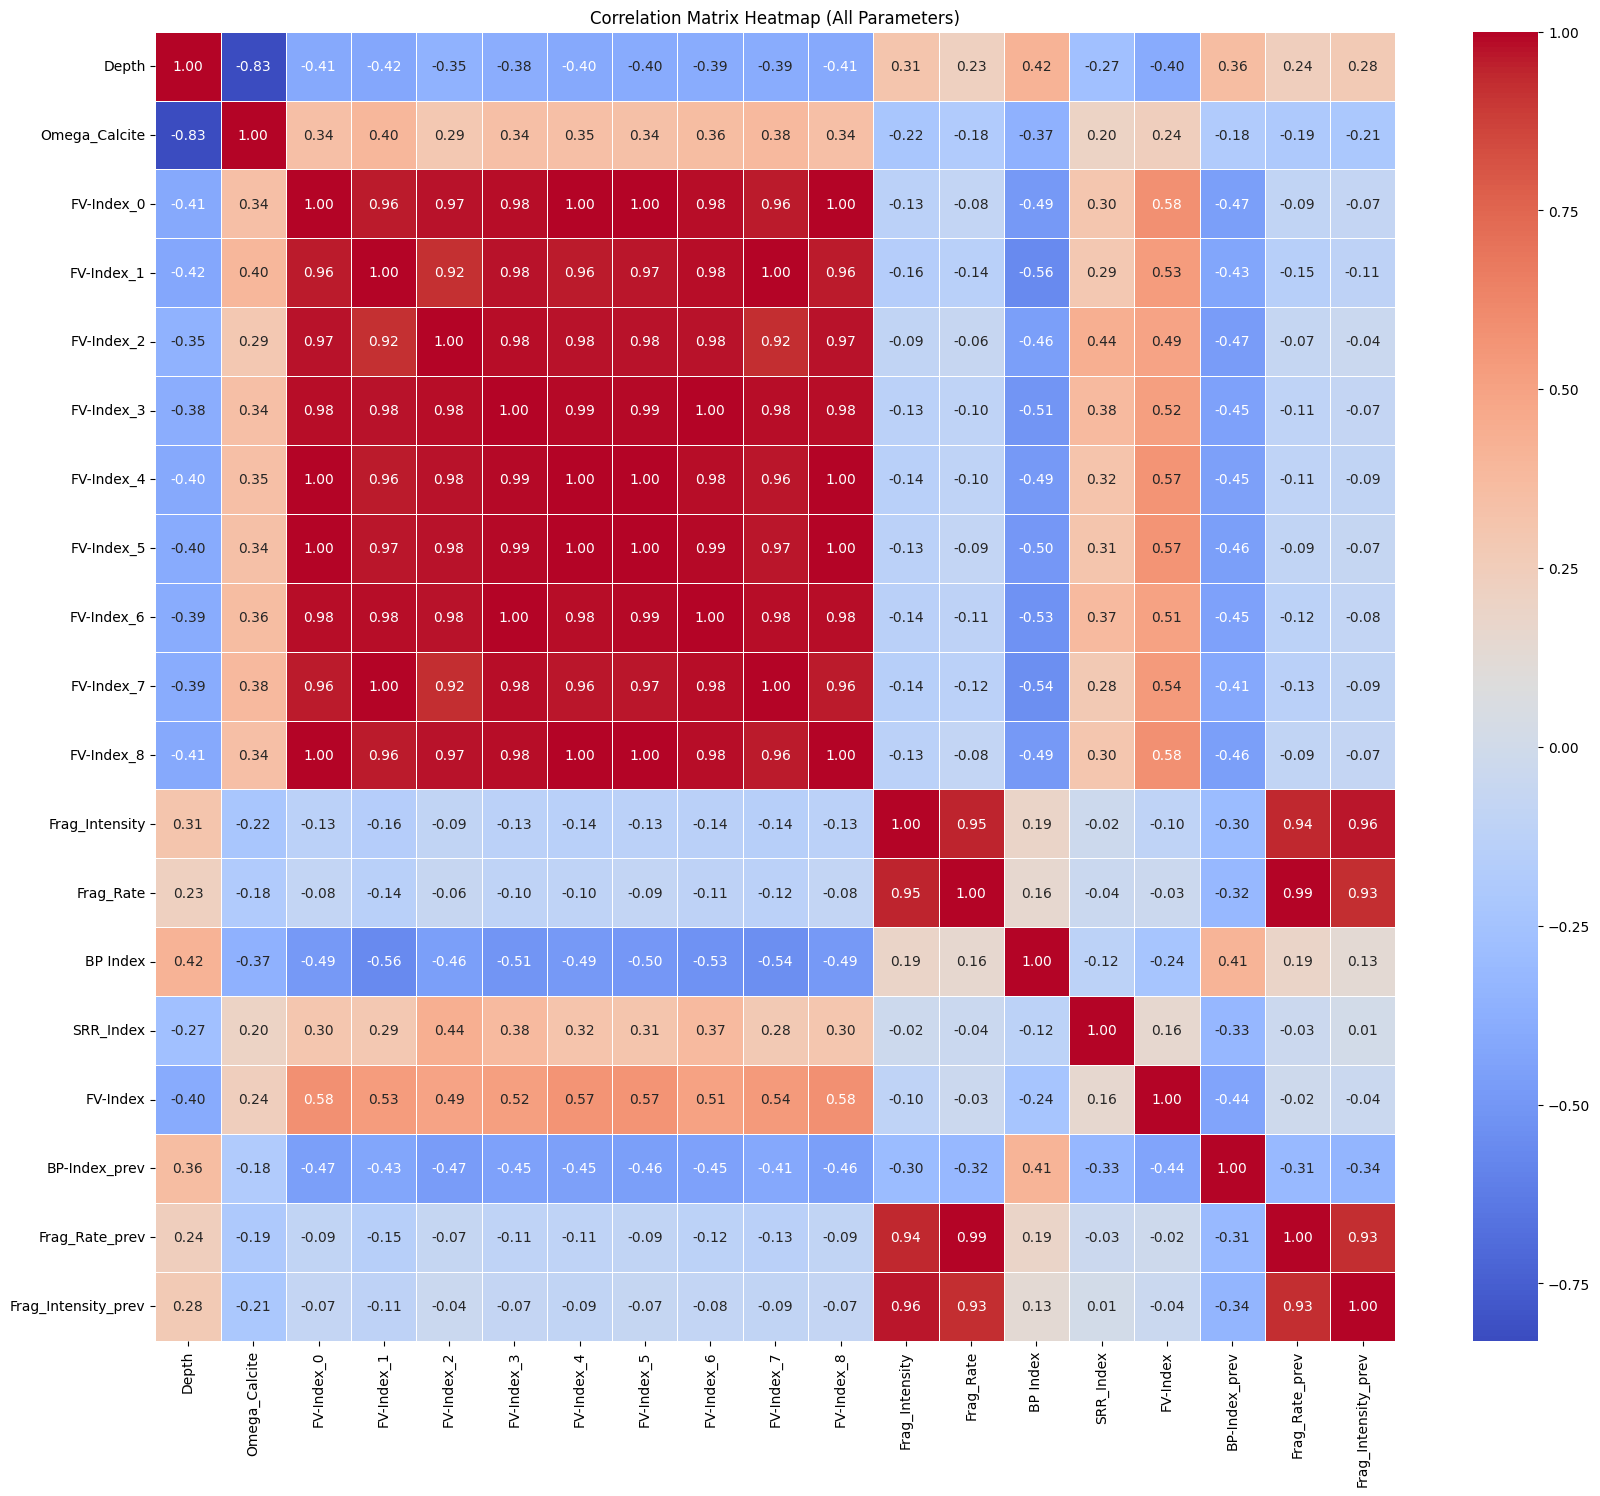

In [50]:
from scipy.stats import pearsonr

# Define the variables of interest
variables = ['Depth', 'Omega_Calcite', 'FV-Index_0', 'FV-Index_1', 'FV-Index_2', 'FV-Index_3',
             'FV-Index_4', 'FV-Index_5', 'FV-Index_6', 'FV-Index_7', 'FV-Index_8', 
             'Frag_Intensity', 'Frag_Rate', 'BP Index', 'SRR_Index',
             'FV-Index', 'BP-Index_prev', 'Frag_Rate_prev',
             'Frag_Intensity_prev',]

# Initialize lists to store the results
r_values = []
r_squared_values = []
p_values = []

# Compute the correlation coefficients, R-squared values, and p-values
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            r, p = pearsonr(merged_tests_all[var1], merged_tests_all[var2])
            r_squared = r**2
            r_values.append((var1, var2, r))
            r_squared_values.append((var1, var2, r_squared))
            p_values.append((var1, var2, p))

# Create DataFrames for the results
r_df = pd.DataFrame(r_values, columns=['Variable 1', 'Variable 2', 'Correlation Coefficient'])
r_squared_df = pd.DataFrame(r_squared_values, columns=['Variable 1', 'Variable 2', 'R-squared'])
p_df = pd.DataFrame(p_values, columns=['Variable 1', 'Variable 2', 'P-value'])

# Merge the DataFrames
results_df = pd.merge(r_df, r_squared_df, on=['Variable 1', 'Variable 2'])
results_df = pd.merge(results_df, p_df, on=['Variable 1', 'Variable 2'])

# Compute the correlation matrix for the heatmap
correlation_matrix_all = merged_tests_all[variables].corr()

# Create a DataFrame for the correlation matrix
correlation_df_all = pd.DataFrame(correlation_matrix_all)

# Generate a heatmap
plt.figure(figsize=(20, 17))
sns.heatmap(correlation_df_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (All Parameters)')
plt.show()

In [51]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', False)

# View 'Correlation Coefficient', 'R-squared', and 'P-value'
results_df

Variable 1      Variable 2  Correlation Coefficient  R-squared       P-value
0                  Depth   Omega_Calcite                -0.830126   0.689109  7.362846e-17
1                  Depth      FV-Index_0                -0.405783   0.164660  1.067451e-03
2                  Depth      FV-Index_1                -0.419328   0.175836  6.928185e-04
3                  Depth      FV-Index_2                -0.354921   0.125969  4.646681e-03
4                  Depth      FV-Index_3                -0.379926   0.144344  2.320986e-03
5                  Depth      FV-Index_4                -0.403664   0.162945  1.140282e-03
6                  Depth      FV-Index_5                -0.397533   0.158032  1.376966e-03
7                  Depth      FV-Index_6                -0.392146   0.153778  1.620370e-03
8                  Depth      FV-Index_7                -0.390753   0.152688  1.689282e-03
..                   ...             ...                      ...        ...           ...
333  Frag_Intensity_prev      FV-Index_7                -0.090242   0.008144  4.854690e-01
334  Frag_Intensity_prev      FV-Index_8                -0.074225   0.005509  5.664096e-01
335  Frag_Intensity_prev  Frag_Intensity                 0.964843   0.930922  1.607662e-36
336  Frag_Intensity_prev       Frag_Rate                 0.926269   0.857974  4.113667e-27
337  Frag_Intensity_prev        BP Index                 0.128895   0.016614  3.180653e-01
338  Frag_Intensity_prev       SRR_Index                 0.012546   0.000157  9.229036e-01
339  Frag_Intensity_prev        FV-Index                -0.038937   0.001516  7.638208e-01
340  Frag_Intensity_prev   BP-Index_prev                -0.338542   0.114611  7.115117e-03
341  Frag_Intensity_prev  Frag_Rate_prev                 0.926595   0.858579  3.617742e-27

[342 rows x 5 columns]

### Checking multicolllinearity in environmental parameters

In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the exogenous (X) variables
X = merged_tests_all[['Depth', 'Omega_Calcite', 'Latitude', 'Sp_Richness', 'Sp_Diversity', 'SST', 'Thermal_Gradient', 'Temp_Seasonality', 'LogPP', 'Salinity']]

# Add a constant term to the predictors
X = sm.add_constant(X)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Variable          VIF
0              const  5876.264973
1              Depth     8.367551
2      Omega_Calcite     7.225370
3           Latitude    10.401253
4        Sp_Richness     3.557216
5       Sp_Diversity     2.062225
6                SST     9.301394
7   Thermal_Gradient     6.754551
8   Temp_Seasonality     8.061021
9              LogPP     4.881904
10          Salinity     3.233961


In [53]:
# Drop collinear parameters (except parameters of interest) and rerun VIF

# Drop specific environmental parameters
X.drop(['Latitude', 'Thermal_Gradient', 'Temp_Seasonality'], inplace=True, axis=1)

# Add a constant term to the predictors
X = sm.add_constant(X)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Variable          VIF
0          const  4350.158644
1          Depth     6.366227
2  Omega_Calcite     4.791772
3    Sp_Richness     1.964094
4   Sp_Diversity     1.764736
5            SST     1.712584
6          LogPP     3.052026
7       Salinity     3.083789


### Structural Equation Modeling

### Depth

⚠️ Warning: High correlations detected between ['Omega_Calcite', 'FV_Index_1', 'Frag_Rate']. Consider removing redundant variables.


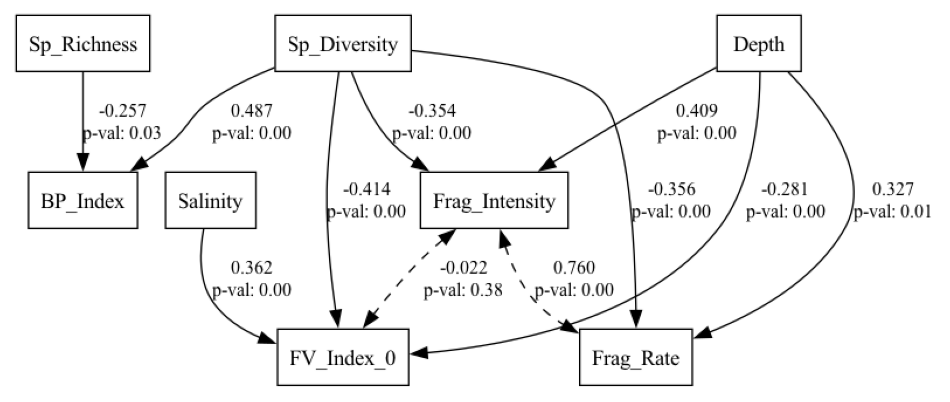


📊 Parameter Estimates:
              lval  op            rval  Estimate  Est. Std  Std. Err   z-value       p-value
0       FV_Index_0   ~           Depth -0.280973 -0.281187  0.086868 -3.234495  1.218581e-03
1       FV_Index_0   ~    Sp_Diversity -0.414220 -0.414535  0.094849 -4.367172  1.258656e-05
2       FV_Index_0   ~        Salinity  0.361584  0.361859  0.090553  3.993084  6.521957e-05
3   Frag_Intensity   ~           Depth  0.408888  0.410134  0.117148  3.490353  4.823829e-04
4   Frag_Intensity   ~    Sp_Diversity -0.353688 -0.354766  0.117148 -3.019151  2.534844e-03
5        Frag_Rate   ~           Depth  0.327317  0.327309  0.120722  2.711322  6.701541e-03
6        Frag_Rate   ~    Sp_Diversity -0.356315 -0.356306  0.120722 -2.951529  3.162049e-03
7         BP_Index   ~     Sp_Richness -0.257316 -0.257274  0.114920 -2.239094  2.514983e-02
8         BP_Index   ~    Sp_Diversity  0.486513  0.486434  0.114920  4.233502  2.300804e-05
9       FV_Index_0  ~~  Frag_Intensity -0.0216

In [54]:
from sklearn.preprocessing import StandardScaler

# Rename columns to remove spaces or dashes for SEM compatibility
merged_tests_all.columns = merged_tests_all.columns.str.replace(r"[\s-]", "_", regex=True)

# Define Endogenous (Y) and Exogenous (X) variables
Y = merged_tests_all[['FV_Index_0', 'FV_Index_1', 'Frag_Intensity', 'Frag_Rate', 'BP_Index', 'SRR_Index']]
X = merged_tests_all[['Depth', 'Omega_Calcite', 'Latitude', 'Sp_Richness', 'Sp_Diversity', 'SST', 'LogPP', 'Salinity']]

# Ensure no missing values before concatenation
data = pd.concat([X, Y], axis=1).dropna()

# Check if data is empty
if data.shape[0] == 0:
    raise ValueError("Error: The dataset is empty after selection!")

# ---------------------------
# 1. Enhanced Data Preparation
# ---------------------------
def prepare_data(df):
    if df is None or not isinstance(df, pd.DataFrame):
        raise ValueError("Error: The input data must be a pandas DataFrame.")

    # Clean column names: replace spaces and dashes with underscores
    df.columns = df.columns.str.replace(r"[\s-]", "_", regex=True)

    # Convert to numeric and handle missing values
    df = df.apply(pd.to_numeric, errors='coerce').dropna()

    # Standardize variables (important for comparing coefficients)
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Check for multicollinearity (warn if correlation > 0.7)
    corr_matrix = df_scaled.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    if high_corr := [col for col in upper.columns if any(upper[col] > 0.7)]:
        print(f"⚠️ Warning: High correlations detected between {high_corr}. Consider removing redundant variables.")

    return df_scaled

# ---------------------------
# 2. Focused Model Specification
# ---------------------------
def create_model():
    # Based on previous results, keep only significant relationships
    return """
    # Fragmentation Processes
    FV_Index_0 ~ Depth + Sp_Diversity + Salinity
    Frag_Intensity ~ Depth + Sp_Diversity
    Frag_Rate ~ Depth + Sp_Diversity
    
    # Biotic Processes
    BP_Index ~ Sp_Richness + Sp_Diversity
    
    # Residual Correlations
    FV_Index_0 ~~ Frag_Intensity
    Frag_Rate ~~ Frag_Intensity
    """

# ---------------------------
# 3. Model Diagnostics & Visualization
# ---------------------------
def run_sem_analysis(data):
    model = Model(create_model())

    # Fit model with robust estimation
    try:
        res = model.fit(data, obj="MLW")
    except Exception as e:
        raise RuntimeError(f"SEM Model fitting failed: {e}") from e

    # Extract results
    estimates = model.inspect(std_est=True)
    fit_indices = calc_stats(model)

     # Extract and display modification indices
    if "mi" in fit_indices:
        mi = fit_indices["mi"]
        print("\nTop Modification Indices:")
        print(mi[mi["mi"] > 3.84].sort_values("mi", ascending=False)) 

    # Visualize the SEM model
    plt.figure(figsize=(12, 8))
    semplot(model, filename="model.png", plot_covs=True)

    img = plt.imread("model.png")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    return estimates, fit_indices

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    # Load data (Ensure data is defined before calling)
    try:
        data = data  # Ensure `merged_tests_all` exists
        prepared_data = prepare_data(data)

        # Run SEM analysis
        estimates, fit_indices = run_sem_analysis(prepared_data)

        # Display results
        pd.set_option("display.max_rows", None)
        print("\n📊 Parameter Estimates:")
        print(estimates)

        print("\n📈 Model Fit Indices:")
        print(fit_indices)
    
    except Exception as e:
        print(f"❌ Error: {e}")

### Omega Calcite

⚠️ Warning: High correlations detected between ['Omega_Calcite', 'FV_Index_1', 'Frag_Rate']. Consider removing redundant variables.


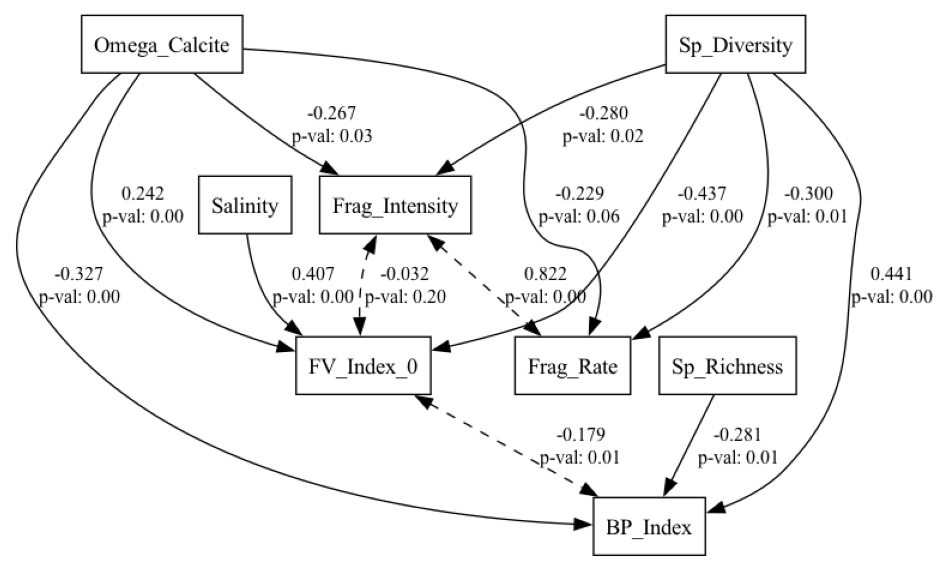


📊 Parameter Estimates:
              lval  op            rval  Estimate  Est. Std  Std. Err   z-value       p-value
0       FV_Index_0   ~   Omega_Calcite  0.242128  0.236193  0.085620  2.827925  4.685076e-03
1       FV_Index_0   ~    Sp_Diversity -0.437297 -0.426578  0.092559 -4.724509  2.306718e-06
2       FV_Index_0   ~        Salinity  0.406773  0.396802  0.087591  4.644021  3.416932e-06
3   Frag_Intensity   ~   Omega_Calcite -0.266961 -0.268110  0.119598 -2.232155  2.560472e-02
4   Frag_Intensity   ~    Sp_Diversity -0.280267 -0.281473  0.119598 -2.343411  1.910833e-02
5        Frag_Rate   ~   Omega_Calcite -0.229156 -0.229201  0.120535 -1.901165  5.728034e-02
6        Frag_Rate   ~    Sp_Diversity -0.299923 -0.299981  0.120535 -2.488271  1.283658e-02
7         BP_Index   ~     Sp_Richness -0.281443 -0.281417  0.102687 -2.740793  6.129119e-03
8         BP_Index   ~    Sp_Diversity  0.441464  0.441422  0.107504  4.106509  4.016837e-05
9         BP_Index   ~   Omega_Calcite -0.3271

In [55]:
from sklearn.preprocessing import StandardScaler

# Rename columns to remove spaces or dashes for SEM compatibility
merged_tests_all.columns = merged_tests_all.columns.str.replace(r"[\s-]", "_", regex=True)

# Define Endogenous (Y) and Exogenous (X) variables
Y = merged_tests_all[['FV_Index_0', 'FV_Index_1', 'Frag_Intensity', 'Frag_Rate', 'BP_Index', 'SRR_Index']]
X = merged_tests_all[['Depth', 'Omega_Calcite', 'Latitude', 'Sp_Richness', 'Sp_Diversity', 'SST', 'LogPP', 'Salinity']]

# Ensure no missing values before concatenation
data = pd.concat([X, Y], axis=1).dropna()

# Check if data is empty
if data.shape[0] == 0:
    raise ValueError("Error: The dataset is empty after selection!")

# ---------------------------
# 1. Enhanced Data Preparation
# ---------------------------
def prepare_data(df):
    if df is None or not isinstance(df, pd.DataFrame):
        raise ValueError("Error: The input data must be a pandas DataFrame.")

    # Clean column names: replace spaces and dashes with underscores
    df.columns = df.columns.str.replace(r"[\s-]", "_", regex=True)

    # Convert to numeric and handle missing values
    df = df.apply(pd.to_numeric, errors='coerce').dropna()

    # Standardize variables (important for comparing coefficients)
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Check for multicollinearity (warn if correlation > 0.7)
    corr_matrix = df_scaled.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    if high_corr := [col for col in upper.columns if any(upper[col] > 0.7)]:
        print(f"⚠️ Warning: High correlations detected between {high_corr}. Consider removing redundant variables.")

    return df_scaled

# ---------------------------
# 2. Focused Model Specification
# ---------------------------
def create_model():
    # Based on previous results, keep only significant relationships
    return """
    # Fragmentation Processes
    FV_Index_0 ~ Omega_Calcite + Sp_Diversity + Salinity
    Frag_Intensity ~ Omega_Calcite + Sp_Diversity
    Frag_Rate ~ Omega_Calcite + Sp_Diversity
    
    # Biotic Processes
    BP_Index ~ Sp_Richness + Sp_Diversity +  Omega_Calcite 
    
    # Residual Correlations
    FV_Index_0 ~~ Frag_Intensity
    Frag_Rate ~~ Frag_Intensity
    BP_Index ~~  FV_Index_0
    """


# ---------------------------
# 3. Model Diagnostics & Visualization
# ---------------------------
def run_sem_analysis(data):
    model = Model(create_model())

    # Fit model with robust estimation
    try:
        res = model.fit(data, obj="MLW")
    except Exception as e:
        raise RuntimeError(f"SEM Model fitting failed: {e}") from e

    # Extract results
    estimates = model.inspect(std_est=True)
    fit_indices = calc_stats(model)

     # Extract and display modification indices
    if "mi" in fit_indices:
        mi = fit_indices["mi"]
        print("\nTop Modification Indices:")
        print(mi[mi["mi"] > 3.84].sort_values("mi", ascending=False)) 

    # Visualize the SEM model
    plt.figure(figsize=(12, 8))
    semplot(model, filename="model.png", plot_covs=True)

    img = plt.imread("model.png")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    return estimates, fit_indices

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    # Load data (Ensure data is defined before calling)
    try:
        data = data  # Ensure `merged_tests_all` exists
        prepared_data = prepare_data(data)

        # Run SEM analysis
        estimates, fit_indices = run_sem_analysis(prepared_data)

        # Display results
        pd.set_option("display.max_rows", None)
        print("\n📊 Parameter Estimates:")
        print(estimates)

        print("\n📈 Model Fit Indices:")
        print(fit_indices)
    
    except Exception as e:
        print(f"❌ Error: {e}")


Columns in Prepared Data: Index(['Frag_Intensity', 'Frag_Rate', 'FV_Index_0', 'BP_Index', 'Depth',
       'Omega_Calcite', 'Latitude', 'Sp_Richness', 'Sp_Diversity', 'SST',
       'LogPP', 'Salinity'],
      dtype='object')

SEM Model Specification:
 
    # Define latent variable 'Fragmentation'
    Fragmentation =~ Frag_Rate + Frag_Intensity 
    Dissolution =~ FV_Index_0 + BP_Index 

    # Regression paths 
    Fragmentation ~ Depth + Omega_Calcite + Sp_Richness 
    Dissolution ~ Omega_Calcite + Sp_Diversity + Salinity
    
    # Covariances
    Frag_Rate ~~ Frag_Intensity
    Depth  ~~ Omega_Calcite
    

Internal Model Structure:
              lval  op            rval  Estimate       Std. Err    z-value   p-value
0    Fragmentation   ~           Depth  0.497208       0.170762    2.91171  0.003595
1    Fragmentation   ~   Omega_Calcite  0.187062       0.148427   1.260297  0.207562
2    Fragmentation   ~     Sp_Richness -0.343261       0.102225  -3.357878  0.000785
3      Dissoluti

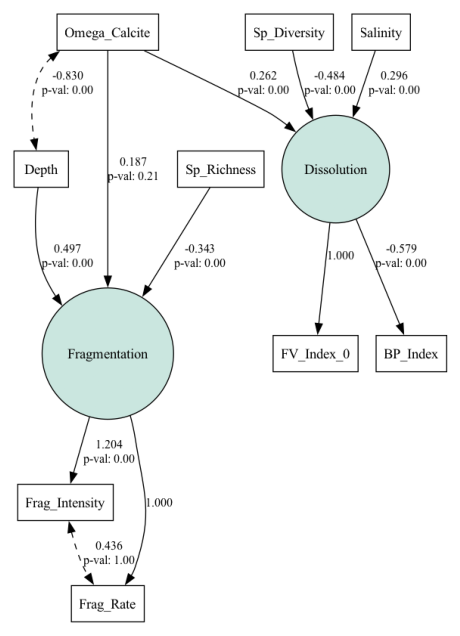


📊 Parameter Estimates:
              lval  op            rval  Estimate  Est. Std       Std. Err    z-value   p-value
0    Fragmentation   ~           Depth  0.497208  0.760888       0.170762    2.91171  0.003595
1    Fragmentation   ~   Omega_Calcite  0.187062  0.286265       0.148427   1.260297  0.207562
2    Fragmentation   ~     Sp_Richness -0.343261 -0.525299       0.102225  -3.357878  0.000785
3      Dissolution   ~   Omega_Calcite  0.262281  0.284271       0.084617   3.099609  0.001938
4      Dissolution   ~    Sp_Diversity -0.484470 -0.525089       0.092456   -5.24001       0.0
5      Dissolution   ~        Salinity  0.295605  0.320389       0.091376   3.235032  0.001216
6        Frag_Rate   ~   Fragmentation  1.000000  0.653380              -          -         -
7   Frag_Intensity   ~   Fragmentation  1.204088  0.786747       0.114375  10.527549       0.0
8       FV_Index_0   ~     Dissolution  1.000000  0.922656              -          -         -
9         BP_Index   ~    

In [56]:
# Rename columns to remove spaces or dashes for SEM compatibility
merged_tests_all.columns = merged_tests_all.columns.str.replace(r"[\s-]", "_", regex=True)

# Define required variables
required_columns = ['Frag_Intensity', 'Frag_Rate', 'FV_Index_0', 'BP_Index', 'Depth', 'Omega_Calcite', 'Latitude', 'Sp_Richness', 'Sp_Diversity', 'SST', 'LogPP', 'Salinity']

# Ensure no missing values in required columns
data = merged_tests_all[required_columns].dropna()

if data.empty:
    raise ValueError("Error: The dataset is empty after selection!")

# Function to create the SEM model string
def create_model():
    return """
    # Define latent variable 'Fragmentation'
    Fragmentation =~ Frag_Rate + Frag_Intensity 
    Dissolution =~ FV_Index_0 + BP_Index 

    # Regression paths 
    Fragmentation ~ Depth + Omega_Calcite + Sp_Richness 
    Dissolution ~ Omega_Calcite + Sp_Diversity + Salinity
    
    # Covariances
    Frag_Rate ~~ Frag_Intensity
    Depth  ~~ Omega_Calcite
    """
#+ Sp_Richness + Sp_Diversity + Salinity
#+ Sp_Richness + Sp_Diversity + Salinity
# Function to run SEM analysis
def run_sem_analysis(data):
    print("\nColumns in Prepared Data:", data.columns)
    model_str = create_model()
    print("\nSEM Model Specification:\n", model_str)

    # Initialize the SEM model
    model = Model(model_str)

    try:
        # Fit the model
        res = model.fit(data, obj="MLW")
    except Exception as e:
        raise RuntimeError(f"SEM Model fitting failed: {e}") from e

    # Inspect estimates and fit indices
    estimates = model.inspect(std_est=True)
    fit_indices = calc_stats(model)

    # Debugging: Print the internal structure of the model
    print("\nInternal Model Structure:")
    print(model.inspect())

    # Print modification indices if available
    if "mi" in fit_indices:
        mi = fit_indices["mi"]
        print("\nTop Modification Indices:")
        print(mi[mi["mi"] > 3.84].sort_values("mi", ascending=False))

    # Plot the SEM model
    plt.figure(figsize=(12, 8))
    semplot(model, filename="model.png", plot_covs=True)
    img = plt.imread("model.png")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    return estimates, fit_indices

# Main execution block
if __name__ == "__main__":
    try:
        # Standardize numeric columns
        scaler = StandardScaler()
        scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

        # Run SEM analysis
        estimates, fit_indices = run_sem_analysis(scaled_data)

        # Display results
        pd.set_option("display.max_rows", None)
        print("\n📊 Parameter Estimates:")
        print(estimates)
        print("\n📈 Model Fit Indices:")
        print(fit_indices)

    except Exception as e:
        print(f"❌ Error: {e}")

In [57]:
merged_tests_all.to_csv('dissolution_indices_2.csv')

In [77]:
mozambique_cores_list = ['MD79-261', 'MD79-260', 'MD96-2049', 'MD79-257','MD96-2051', 
                         'MD96-2053', 'MD96-2054', 'MD96-2055', 'MD96-2056','MD96-2067b',
                         'MD96-2058', 'MD96-2059', 'MD96-2066', 'MD96-2065', 'MD96-2063',
                         'MD96-2061', 'MD96-2064', 'MD96-2060' ]

In [78]:
# Extract Mozambique Channel cores from foram data

def get_mozambique_cores(foram_data, cores_list):
    """
    Extracts the Mozambique Channel cores from the foram data.
    
    Parameters:
        foram_data (pd.DataFrame): The foram data.
        cores_list (list): A list of core IDs to extract.
    
    Returns:
        pd.DataFrame: The subset of foram data corresponding to the Mozambique Channel cores.
    """
    return foram_data[foram_data['Core_ID'].isin(cores_list)]


In [79]:
mozambique_cores = get_mozambique_cores(merged_tests_all, mozambique_cores_list)

In [80]:
mozambique_cores.reset_index(drop=True, inplace=True)